# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

## ÎùºÏù¥Î∏åÎü¨Î¶¨

In [1]:
# %pip install --upgrade pip

In [2]:
## ÌÖçÏä§Ìä∏ Ï≤òÎ¶¨
# !pip install JPype1-1.3.0-cp39-cp39-win_amd64.whl
# !pip install konlpy
## ÌÜµÍ≥ÑÍ≤ÄÏ†ï
#!pip install pingouin

In [3]:
# import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pingouin as pg
from scipy.stats import mannwhitneyu

import re
import sys

import itertools
from collections import Counter

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Í∑∏ÎûòÌîÑ ÌïúÍ∏ÄÌè∞Ìä∏ Ï∂úÎ†•ÏùÑ ÏúÑÌïú ÏΩîÎìú
def get_font_family():
    '''
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    '''
    import platform
    system_name = platform.system()
    # mac OS ÏùºÎïå
    if system_name == 'Darwin' :
        font_faimly = 'AppleGothic'
    # ÏúàÎèÑÏö∞ÏùºÎñÑ 
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = 'NanumBarunGothic'

    return font_family

# style ÏÑ§Ï†ïÏùÄ Íº≠ Ìè∞Ìä∏ÏÑ§Ï†ï ÏúÑÏóêÏÑú ÌïúÎã§. 
# styleÏóê Ìè∞Ìä∏ ÏÑ§Ï†ïÏù¥ Îì§Ïñ¥ÏûàÏúºÎ©¥ ÌïúÍ∏ÄÌè∞Ìä∏Í∞Ä Ï¥àÍ∏∞Ìôî ÎêòÏñ¥ Íπ®ÏßÑÎã§.
# plt.style.use('seaborn')

#Ìè∞Ìä∏ÏÑ§Ï†ï
plt.rc('font', family=get_font_family())

#ÎßàÏù¥ÎÑàÏä§Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('axes', unicode_minus=False)

# Í∑∏ÎûòÌîÑÏóê retina display Ï†ÅÏö©
# Í∑∏ÎûòÌîÑ Ìï¥ÏÉÅÎèÑ 
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

# Í∏∞ÏóÖÎ¶¨Ïä§Ìä∏

## Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞

In [5]:
# Í∏∞ÏóÖ Î¶¨Ïä§Ìä∏ csv Î∂àÎü¨Ïò§Í∏∞
df_company_list = pd.read_csv('./input/df_company_list.csv', index_col=0)
print(df_company_list.shape)
df_company_list.head(3)

(1201, 7)


ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú       ÏóÖÏ¢Ö Î≥∏ÏÇ¨ÏúÑÏπò   Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                                   
0           (Ï£º)Ìã∞Î™¨  50695  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏  2022   2.8  4426
1          (Ï£º)ÏúÑÎ©îÌîÑ  60632  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏  2003   2.6  2874
2      ÏÇºÏÑ±ÏóêÏä§ÎîîÏóêÏä§(Ï£º)  30162  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏  1801   3.5  8296

In [6]:
df_company_list.tail(3)

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú       ÏóÖÏ¢Ö Î≥∏ÏÇ¨ÏúÑÏπò  Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                                   
1198        ÏΩ§ÏúÑÏ¶à(Ï£º)  91089  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   30   2.4  2794
1199       Ìä∏ÎüºÌîºÏïÑ(Ï£º)  92889  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   30   2.0  4144
1200   ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ(Ï£º)  90425  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   30   2.3  3058

## Í∏∞Î≥∏Ï†ïÎ≥¥ ÌôïÏù∏

### info

In [7]:
df_company_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1200
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ÌöåÏÇ¨Î™Ö     1201 non-null   object 
 1   ÌöåÏÇ¨ÏΩîÎìú    1201 non-null   int64  
 2   ÏóÖÏ¢Ö      1201 non-null   object 
 3   Î≥∏ÏÇ¨ÏúÑÏπò    1201 non-null   object 
 4   Î¶¨Î∑∞Ïàò     1201 non-null   int64  
 5   ÌèâÍ∑†Î≥ÑÏ†ê    1201 non-null   float64
 6   ÌèâÍ∑†Ïó∞Î¥â    1201 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 75.1+ KB


### Í≤∞Ï∏°Ïπò

In [8]:
df_company_list.isnull().sum()

ÌöåÏÇ¨Î™Ö     0
ÌöåÏÇ¨ÏΩîÎìú    0
ÏóÖÏ¢Ö      0
Î≥∏ÏÇ¨ÏúÑÏπò    0
Î¶¨Î∑∞Ïàò     0
ÌèâÍ∑†Î≥ÑÏ†ê    0
ÌèâÍ∑†Ïó∞Î¥â    0
dtype: int64

### Ï§ëÎ≥µÍ∞í
- ÌöåÏÇ¨Î™ÖÏùò ÏΩîÎìúÏôÄ ÌöåÏÇ¨ÏΩîÎìúÏùò Í∏∏Ïù¥Í∞Ä Îã§Î•¥Îã§
    - Ï§ëÎ≥µÎêòÎäî ÌöåÏÇ¨Î™Ö Ï°¥Ïû¨
    - ÌöåÏÇ¨ÏΩîÎìúÎ•º Ï†ëÎØ∏ÏÇ¨Î°ú Îã¨ÏïÑÏÑú Ï≤òÎ¶¨

In [9]:
# ÌöåÏÇ¨Î™Ö - ÌöåÏÇ¨ÏΩîÎìú uniqueÏàòÍ∞Ä Îã§Î•¥Îã§
df_company_list.nunique()

ÌöåÏÇ¨Î™Ö     1200
ÌöåÏÇ¨ÏΩîÎìú    1201
ÏóÖÏ¢Ö         1
Î≥∏ÏÇ¨ÏúÑÏπò      17
Î¶¨Î∑∞Ïàò      280
ÌèâÍ∑†Î≥ÑÏ†ê      35
ÌèâÍ∑†Ïó∞Î¥â    1011
dtype: int64

In [10]:
# Ï§ëÎ≥µÎêòÎäî ÌöåÏÇ¨Î™Ö Í≤ÄÏÉâ
df_company_list[df_company_list.duplicated(subset='ÌöåÏÇ¨Î™Ö')]

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú       ÏóÖÏ¢Ö Î≥∏ÏÇ¨ÏúÑÏπò  Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                                 
529    (Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò  86935  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   79   2.8  3556

In [11]:
# Ï§ëÎ≥µÎç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥ ÌôïÏù∏
df_company_list[df_company_list['ÌöåÏÇ¨Î™Ö']=='(Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò']

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú       ÏóÖÏ¢Ö Î≥∏ÏÇ¨ÏúÑÏπò  Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                                 
484    (Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò  89732  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   87   2.6  3839
529    (Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò  86935  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   79   2.8  3556

In [12]:
# Ï§ëÎ≥µÎç∞Ïù¥ÌÑ∞ + Ï†ëÎØ∏ÏÇ¨(ÌöåÏÇ¨ÏΩîÎìú) Ï≤òÎ¶¨
df_company_list['ÌöåÏÇ¨Î™Ö'] = df_company_list.apply(lambda x: x['ÌöåÏÇ¨Î™Ö']+'_'+ str(x['ÌöåÏÇ¨ÏΩîÎìú']) if x['ÌöåÏÇ¨Î™Ö']=='(Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò' else x['ÌöåÏÇ¨Î™Ö'], axis=1)

In [13]:
# ÌöåÏÇ¨Î™Ö nunique Î≥ÄÍ≤Ω
df_company_list.nunique()

ÌöåÏÇ¨Î™Ö     1201
ÌöåÏÇ¨ÏΩîÎìú    1201
ÏóÖÏ¢Ö         1
Î≥∏ÏÇ¨ÏúÑÏπò      17
Î¶¨Î∑∞Ïàò      280
ÌèâÍ∑†Î≥ÑÏ†ê      35
ÌèâÍ∑†Ïó∞Î¥â    1011
dtype: int64

In [14]:
# Î≥ÄÍ≤Ω ÏôÑÎ£å
cond = df_company_list['ÌöåÏÇ¨Î™Ö'].str.contains('Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò')
df_company_list[cond]

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú       ÏóÖÏ¢Ö Î≥∏ÏÇ¨ÏúÑÏπò  Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                                       
484    (Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò_89732  89732  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   87   2.6  3839
529    (Ï£º)Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò_86935  86935  IT/Ïõπ/ÌÜµÏã†   ÏÑúÏö∏   79   2.8  3556

### Í∏∞ÌÉÄ
- ITÍ∏∞ÏóÖ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂úÌñàÏúºÎØÄÎ°ú `ÏóÖÏ¢Ö` Ïª¨Îüº Ï†úÍ±∞
- `ÌöåÏÇ¨ÏΩîÎìú` Ï†úÍ±∞ 

In [15]:
df_company_list.drop(['ÌöåÏÇ¨ÏΩîÎìú','ÏóÖÏ¢Ö'], axis=1, inplace=True)

## Î∂ÑÏÑù

- ÏÑúÏö∏,Í≤ΩÍ∏∞ ÏßÄÏó≠Ïóê Î≥∏ÏÇ¨Í∞Ä Î∞ÄÏßëÎêòÏñ¥ÏûàÎã§ (Ï†ÑÏ≤¥Ïùò 94% Ïù¥ÏÉÅ)
    - Ïû°ÌîåÎûòÎãõ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞Í∞Ä 30Í∞ú Ïù¥ÏÉÅÏù∏ ITÍ∏∞ÏóÖ Í∏∞Ï§Ä

In [16]:
grouped = df_company_list.value_counts('Î≥∏ÏÇ¨ÏúÑÏπò',normalize=True).reset_index(name='prop.')
grouped['ÎàÑÏ†Å'] = grouped['prop.'].cumsum()
grouped.head(5)

Î≥∏ÏÇ¨ÏúÑÏπò     prop.        ÎàÑÏ†Å
0   ÏÑúÏö∏  0.810991  0.810991
1   Í≤ΩÍ∏∞  0.129892  0.940883
2   ÎåÄÍµ¨  0.011657  0.952540
3   Î∂ÄÏÇ∞  0.010824  0.963364
4   ÎåÄÏ†Ñ  0.010824  0.974188

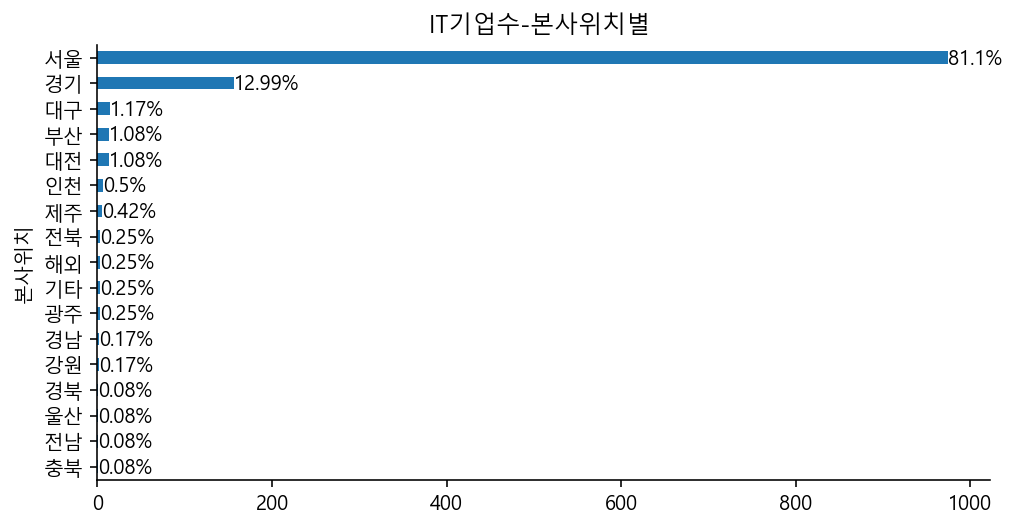

In [17]:
#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,4))
grouped = df_company_list.value_counts('Î≥∏ÏÇ¨ÏúÑÏπò').sort_values()
g = grouped.plot(kind='barh')

# ÏàòÏπò Í∏∞ÏûÖ
for bar, val in zip(g.patches, grouped.values):
    g.annotate(f'{round(val/len(df_company_list)*100,2)}%', (val, bar.get_y()))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


plt.title('ITÍ∏∞ÏóÖÏàò-Î≥∏ÏÇ¨ÏúÑÏπòÎ≥Ñ ')
plt.show()

- `ÌèâÍ∑†Î≥ÑÏ†ê`Í≥º `ÌèâÍ∑†Ïó∞Î¥â` ÏÇ¨Ïù¥Ïóê ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï°¥Ïû¨

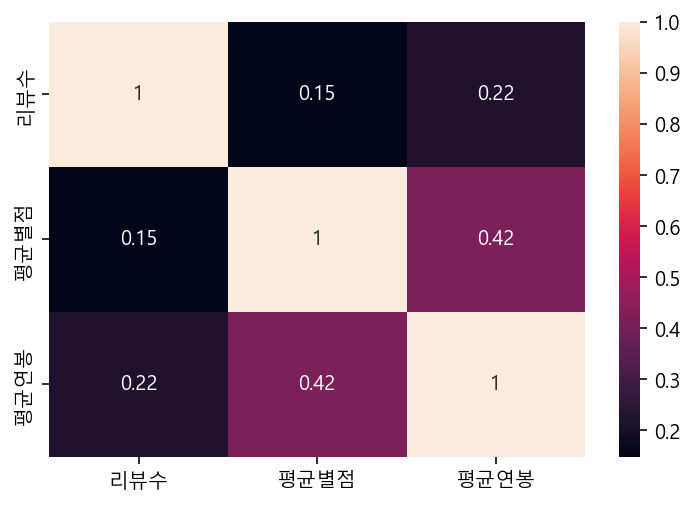

In [18]:
sns.heatmap(df_company_list.corr(), annot=df_company_list.corr());

- Í∏∞ÏóÖÏùò ÌèâÍ∑†Ïó∞Î¥âÏù¥ ÎÜíÏùÑ ÏàòÎ°ù ÌèâÍ∑†Î≥ÑÏ†êÏù¥ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ• Î≥¥Ïù∏Îã§.

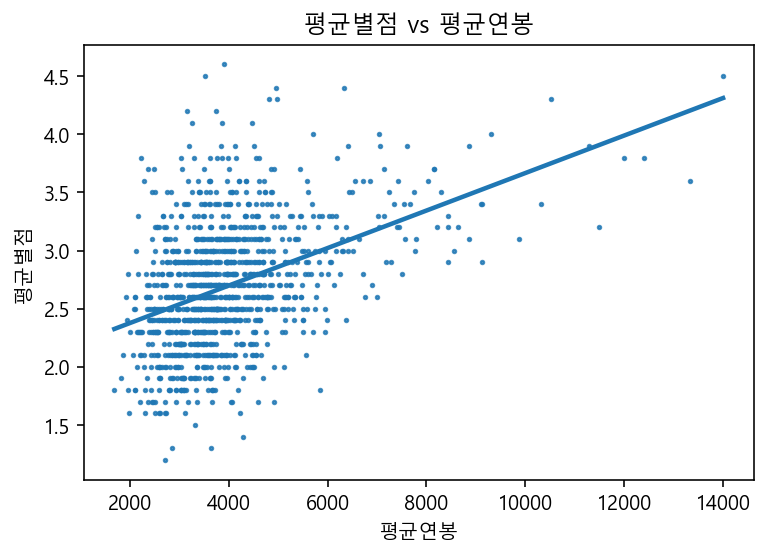

In [19]:
df = df_company_list
y='ÌèâÍ∑†Î≥ÑÏ†ê'
x='ÌèâÍ∑†Ïó∞Î¥â'

sns.regplot(y=y,x=x, data=df, ci=None, scatter_kws={'s':3})
plt.title('ÌèâÍ∑†Î≥ÑÏ†ê vs ÌèâÍ∑†Ïó∞Î¥â');

In [20]:
order = df.groupby(['Î≥∏ÏÇ¨ÏúÑÏπò'])['ÌèâÍ∑†Î≥ÑÏ†ê'].mean().sort_values(ascending=False).index

üî•
- ÌèâÍ∑†Ïó∞Î¥âÏù¥ ÎÇÆÏùÄÎç∞ ÌèâÏ†êÏù¥ ÎÜíÏùÄ ÌöåÏÇ¨Îäî Ïñ¥Îñ§ Í≥≥Ïù∏Í∞Ä?
- Î∞òÎåÄÎ°ú ÌèâÍ∑†Ïó∞Î¥âÏù¥ ÎÜíÏùÄÎç∞ ÌèâÏ†êÏù¥ ÎÇÆÏùÄ Í≤ΩÏö∞Îäî?
- ÌäπÏ†ï Í∏∞ÏóÖÏùò Í≤ΩÏö∞ ÌèâÏ†êÏ°∞Ïûë ÏùòÌòπÏù¥ ÏûàÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏùå
    - ÌèâÏ†ê Ï°∞ÏûëÏùÄ Ïñ¥ÎñªÍ≤å Ï∞æÏïÑÎÇ¥ÎÇò?

In [21]:
df_company_list.sort_values('ÌèâÍ∑†Î≥ÑÏ†ê')

ÌöåÏÇ¨Î™Ö Î≥∏ÏÇ¨ÏúÑÏπò  Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê   ÌèâÍ∑†Ïó∞Î¥â
index                                     
404    ÎîîÏûêÏù∏Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò(Ï£º)   ÏÑúÏö∏  100   1.2   2718
880         (Ï£º)ÏÑ∏Ïù¥ÌçºÏ°¥   ÎåÄÏ†Ñ   44   1.3   3639
786        (Ï£º)ÏïÑÏù¥ÎÑ§ÏûÑÏ¶à   Í≤ΩÍ∏∞   51   1.3   2853
731        Ìó§Ïù¥ÏΩîÎ¶¨Ïïà(Ï£º)   ÏÑúÏö∏   56   1.4   4298
965        ÏïÑÏù¥Î¶¨ÏãúÏä§(Ï£º)   ÏÑúÏö∏   40   1.5   3311
...             ...  ...  ...   ...    ...
1092     (Ï£º)ÏÑºÎìúÎ≤ÑÎìúÏΩîÎ¶¨ÏïÑ   ÏÑúÏö∏   34   4.4   4946
666       ÎùºÏù¥ÏóáÍ≤åÏûÑÏ¶àÏΩîÎ¶¨ÏïÑ   Ìï¥Ïô∏   62   4.4   6337
1185          (Ï£º)ÏÇ¥Îã§   ÏÑúÏö∏   30   4.5   3518
598      ÌéòÏù¥Ïä§Î∂ÅÏΩîÎ¶¨ÏïÑ(Ïú†)   ÏÑúÏö∏   71   4.5  14001
1051         (Ï£º)Ìï´ÏÖÄÎü¨   ÏÑúÏö∏   36   4.6   3900

[1201 rows x 5 columns]

# Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞

## Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞

- Îç∞Ïù¥ÌÑ∞ Í∞±Ïã†(Ïä§ÌÅ¨Î†àÏù¥Ìïë ÏóêÎü¨ ÏóÜÎäî Î≤ÑÏ†ÑÏúºÎ°ú Í∞±Ïã†)

In [22]:
df_reviews = pd.read_csv('./input/df_reviews.csv', index_col=0,  low_memory=False)
print(df_reviews.shape)
df_reviews.head(3)

(148821, 19)


ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠       ÏûëÏÑ±Ïõî  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  \
index                                                                          
0      Ìã∞Î™¨  50695  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2022. 04   3            5        5   
1      Ìã∞Î™¨  50695     ÏòÅÏóÖ/Ï†úÌú¥      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2022. 04   3            5        5   
2      Ìã∞Î™¨  50695       ÎîîÏûêÏù∏      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2022. 04   2            1        1   

       ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ  \
index                         
0              5     5    5   
1              5     1    1   
2              2     1    1   

                                                      Ï¥ùÌèâ  \
index                                                      
0                              Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïûò Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò ÌöåÏÇ¨   
1      ÏòÅÏóÖÎ∂ÄÏÑúÎäî Í∑∏ÎÇòÎßà Ïö¥ÏòÅÏù¥ ÏûòÎêòÎÇò,  Î≥Ñ ÏùòÎØ∏ÏóÜÎäî ÏΩòÌÖêÏ∏† Ï†úÏûëÍ¥ÄÎ†®Ìïú Î¶¨ÏÜåÏä§Í∞Ä ÎÑàÎ¨¥ Îì§...   
2                  ÌïòÎ£®Í∞Ä Îã§Î•¥Í≤å Î∞îÎÄåÎäî Ï°∞ÏßÅÏù¥Ï†ÑÏùò Ï¢ãÏïòÎçò Í∏∞ÏñµÎßàÏ†Ä Ìá¥ÏÉâÎêòÍ≤åÌïòÎäî Í≤ΩÏòÅÏßÑ   

                                                      Ïû•Ï†ê  \
index                                                      
0                       ÏÇ¨ÎÇ¥ Ïπ¥Ìéò,ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ Îì± ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®   
1      Ïó∞Ï∞®ÏÇ¨Ïö© ÏûêÏú† / ÌïòÎ∞òÍ∏∞Î∂ÄÌÑ∞ ÏãúÏûëÎêòÎäî Ï†ÑÏÇ¨ Î¶¨Î™®Ìä∏ÏõåÌÅ¨Î°ú Ïù∏Ìïú ÏûêÏú®ÏÑ± Í∑πÎåÄÌôî. \nÏòÅ...   
2      Î¶¨Î™®Ìä∏ÏõåÌÅ¨ Ï§ÄÎπÑ Ï§ëÏúºÎ°ú 6ÏõîÎ∂ÄÌÑ∞ Ï†ÑÏÇ¨ Ïû¨ÌÉùÍ∑ºÎ¨¥ ÏòàÏ†ïÏ†äÏùÄ ÏßÅÏõêÎì§ ÌåÄÎ∞îÌåÄÏù¥ÏßÄÎßå Ìï®Íªò Î≤Ñ...   

                                                      Îã®Ï†ê  \
index                                                      
0       ÎÇòÎ¶Ñ Í±¥Í∞ï ÏÉùÍ∞ÅÌïòÎäî Ìù°Ïó∞ÏûêÏòÄÏñ¥ÏÑú ÎãπÏãú Ìù°Ïó∞ÌïòÎü¨ ÌïòÎ£®Ïóê 3Î≤àÎßå ÎÇòÍ∞îÎäîÎç∞ ÏúÑÏóêÏÑú ÏßÄÏ†Å Î∞õÏùå   
1      ÎèôÍ∏∞Î∂ÄÏó¨ÎèÑÏßÄ ÏïäÎäî Î™®Îì†Í≤É ? / 2~3ÎÖÑ Îã§ÎãàÍ≥† Í≤ΩÌóòÏåìÍ∏∞Îäî Ï¢ãÏùå MDÍ∂åÌïú ÎßéÏùå\nÎåÄ...   
2      ÏûàÎçò Î≥µÏßÄÎèÑ ÏÇ¨ÎùºÏßÄÎäî Ï§ëÏû¶ÏùÄ Ï°∞ÏßÅÍ∞úÌé∏Í≥º Í≤ΩÏòÅÏßÑ ÍµêÏ≤¥Î¶¨ÎçîÏôÄ ÏãúÎãàÏñ¥Îì§ ÎåÄÍ±∞ Ìá¥ÏÇ¨Î°ú Ï£ºÎãà...   

                                              Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä  \
index                                                                         
0                                 Ï¢ãÏùÄ ÏÇ¨ÎÇ¥Î¨∏ÌôîÍ∞Ä ÎßåÎì§Ïñ¥ÏßÄÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå         ÏÑ±Ïû•      Ï∂îÏ≤ú   
1      Ïã†Í∑úÏÇ¨ÏóÖÏùÑ ÌïòÎ†§Î©¥ Ï≤≠ÏÇ¨ÏßÑÎ∂ÄÌÑ∞ Í∑∏Î¶¨Í≥† Î∞©Ìñ•ÏÑ±Ïóê ÎßûÍ≤å Í∞ÄÏù¥ÎìúÎùºÏù∏ÏùÑ ÎßåÎì§Í≥†, Ïù∏ÏÇ¨ÌåÄÏùò Í∂å...         ÎπÑÏä∑      Ï∂îÏ≤ú   
2      ÏÇ¨ÏóÖÏóê ÎåÄÌïú ÎπÑÏ†ÑÍ≥º Í∑∏Î•º Ïã§ÌòÑÏãúÌÇ¨ Ïàò ÏûàÎäî Íµ¨Ï≤¥Ï†ÅÏù∏ Î∞©Ìñ•ÏùÑ Ï†úÏãúÌï¥Ï£ºÍ∏∏ ÏõêÌï©ÎãàÎã§Î™®ÎëêÍ∞Ä...        NaN     ÎπÑÏ∂îÏ≤ú   

       Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò  
index            
0             0  
1             0  
2             0

In [23]:
df_reviews.tail(3)

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠       ÏûëÏÑ±Ïõî  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  \
index                                                                        
148818  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  90425  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2015. 08   2            2   
148819  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  90425        Í∏∞ÌÉÄ      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2015. 03   2            3   
148820  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  90425        Í∏∞ÌÉÄ      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2014. 11   2            2   

        Î≥µÏßÄ Î∞è Í∏âÏó¨  ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ                              Ï¥ùÌèâ  \
index                                                                   
148818        2          2     2    2  Í≥µÍ≥µÍ∏∞Í¥Ä ÏïÑÎûòÏóêÏÑú Ï§ëÏÜåÍ∏∞ÏóÖÏùÑ ÎèïÎäî ÏóÖÎ¨¥Îäî ÏßÑÌñâÌïòÎäî ÌöåÏÇ¨   
148819        2          2     1    2               Ï§ëÏÜåÍ∏∞ÏóÖÍ≥º Í∞ÄÍπåÏù¥ ÏùºÌïòÎäî ÌöåÏÇ¨.   
148820        3          2     2    2      Ïô∏Íµ≠Ïù∏ Ïù¥Î©¥ Îì§Ïñ¥Í∞ÄÍ∏∞ ÌûòÎì≠ÎãàÎã§.ÎßàÏºÄÌåÖ Í¥ÄÏã¨ ÌïÑÏöî   

                                        Ïû•Ï†ê  \
index                                        
148818  Í≥µÍ≥µÍ∏∞Í¥Ä Î∞è ÌòëÌöå ÏóÖÎ¨¥Ïóê ÎåÄÌï¥ÏÑú ÏßÅÍ∞ÑÏ†ëÏ†ÅÏù∏ Í≤ΩÌóòÏùÑ Ìï† Ïàò ÏûàÏùå   
148819         Íµ≠ÎÇ¥ Îã§ÏñëÌïú Ï§ëÏÜåÍ∏∞ÏóÖÏùÑ Ï†ëÌï¥Î≥º Ïàò ÏûàÎäî Í∏∞ÌöåÍ∞Ä Îê®   
148820        Î≤àÏó≠ ÏïåÎ∞îÏÉù ÏúºÎ°ú ÏùºÏùÑÌï¥Î¥§ÎäîÎç∞ Ïù¥Ï£ºÏùºÏóê ÌïòÎ£®Îßå Í∑ºÎ¨¥   

                                              Îã®Ï†ê  \
index                                              
148818   ÏßÅÏõêÏùò Ìù¨ÏÉùÏóê ÎåÄÌï¥ÏÑú ÎãπÏó∞ÏãúÌïòÎäî Í≤ΩÌñ• ÏûàÏúºÎ©∞,Í∑∏ ÎïåÎ¨∏Ïóê Ìá¥ÏÇ¨Í∞Ä ÎßéÏùÄ Ìé∏   
148819     ÏöîÏ¶òÏùÄ Î™®Î•¥Í≤†ÎäîÎç∞ ÏòàÏ†ÑÏóî ÏóÖÎ¨¥Îäî ÎßéÏùÄÎç∞ ÏÇ¨ÎûåÏù¥ Î≥ÑÎ°ú ÏóÜÏñ¥ÏÑú ÌûòÎì§ÏóàÏùå   
148820  ÏßßÏùÄ ÏãúÍ∞Ñ ÎèôÏïà ÎßéÏùÄ ÏñëÏúºÎ°ú Î≤àÏó≠ Ìï¥ÏïºÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ïä§Ìä∏ÎûòÏä§ ÎßéÏù¥ Î∞õÏäµÎãàÎã§   

                                       Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä  Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò  
index                                                                           
148818  ÌöåÏÇ¨Î•º Î∞úÏ†ÑÏãúÌÇ§Í≥† Ïã∂Îã§Î©¥ Ïö∞ÏÑ† ÏßÅÏõêÏùò ÏÇ∂Ïù¥ Î∞úÏ†ÑÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏùÑ ÏïåÏïÑÏïº Ìï®         ÎπÑÏä∑     ÎπÑÏ∂îÏ≤ú         3  
148819                      ÏóÖÎ¨¥Î∞∞Î∂ÑÏù¥ Ìö®Ïú®Ï†ÅÏù¥Î©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî.         ÎπÑÏä∑     ÎπÑÏ∂îÏ≤ú         2  
148820                    Î≥ÑÎ°ú Ï∂îÏ≤úÌïòÏßÄ ÏïäÏäµÎãàÎã§. ÏïºÍ∑º Ï§ÄÎπÑ Ìï¥ÏïºÌï®         ÎπÑÏä∑     ÎπÑÏ∂îÏ≤ú         0

## Í∏∞Î≥∏Ï†ïÎ≥¥ ÌôïÏù∏

### info

In [24]:
df = df_reviews.copy()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148821 entries, 0 to 148820
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ÌöåÏÇ¨Î™Ö          148821 non-null  object
 1   ÌöåÏÇ¨ÏΩîÎìú         148821 non-null  int64 
 2   ÏßÅÍµ∞           148649 non-null  object
 3   Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ     148821 non-null  object
 4   Í∑ºÎ¨¥ÏßÄÏó≠         145610 non-null  object
 5   ÏûëÏÑ±Ïõî          148730 non-null  object
 6   Î≥ÑÏ†ê           148821 non-null  int64 
 7   ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  148821 non-null  int64 
 8   Î≥µÏßÄ Î∞è Í∏âÏó¨      148821 non-null  int64 
 9   ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï    148821 non-null  int64 
 10  ÏÇ¨ÎÇ¥Î¨∏Ìôî         148821 non-null  int64 
 11  Í≤ΩÏòÅÏßÑ          148821 non-null  int64 
 12  Ï¥ùÌèâ           148820 non-null  object
 13  Ïû•Ï†ê           148821 non-null  object
 14  Îã®Ï†ê           148821 non-null  object
 15  Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê   148733 non-null  object
 16

### Í≤∞Ï∏°Ïπò

In [26]:
df.isnull().sum()

ÌöåÏÇ¨Î™Ö                0
ÌöåÏÇ¨ÏΩîÎìú               0
ÏßÅÍµ∞               172
Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ           0
Í∑ºÎ¨¥ÏßÄÏó≠            3211
ÏûëÏÑ±Ïõî               91
Î≥ÑÏ†ê                 0
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±        0
Î≥µÏßÄ Î∞è Í∏âÏó¨            0
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï          0
ÏÇ¨ÎÇ¥Î¨∏Ìôî               0
Í≤ΩÏòÅÏßÑ                0
Ï¥ùÌèâ                 1
Ïû•Ï†ê                 0
Îã®Ï†ê                 0
Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê        88
1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù     44040
Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä            0
Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò           0
dtype: int64

- 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÏñ¥ÏûàÎäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§.

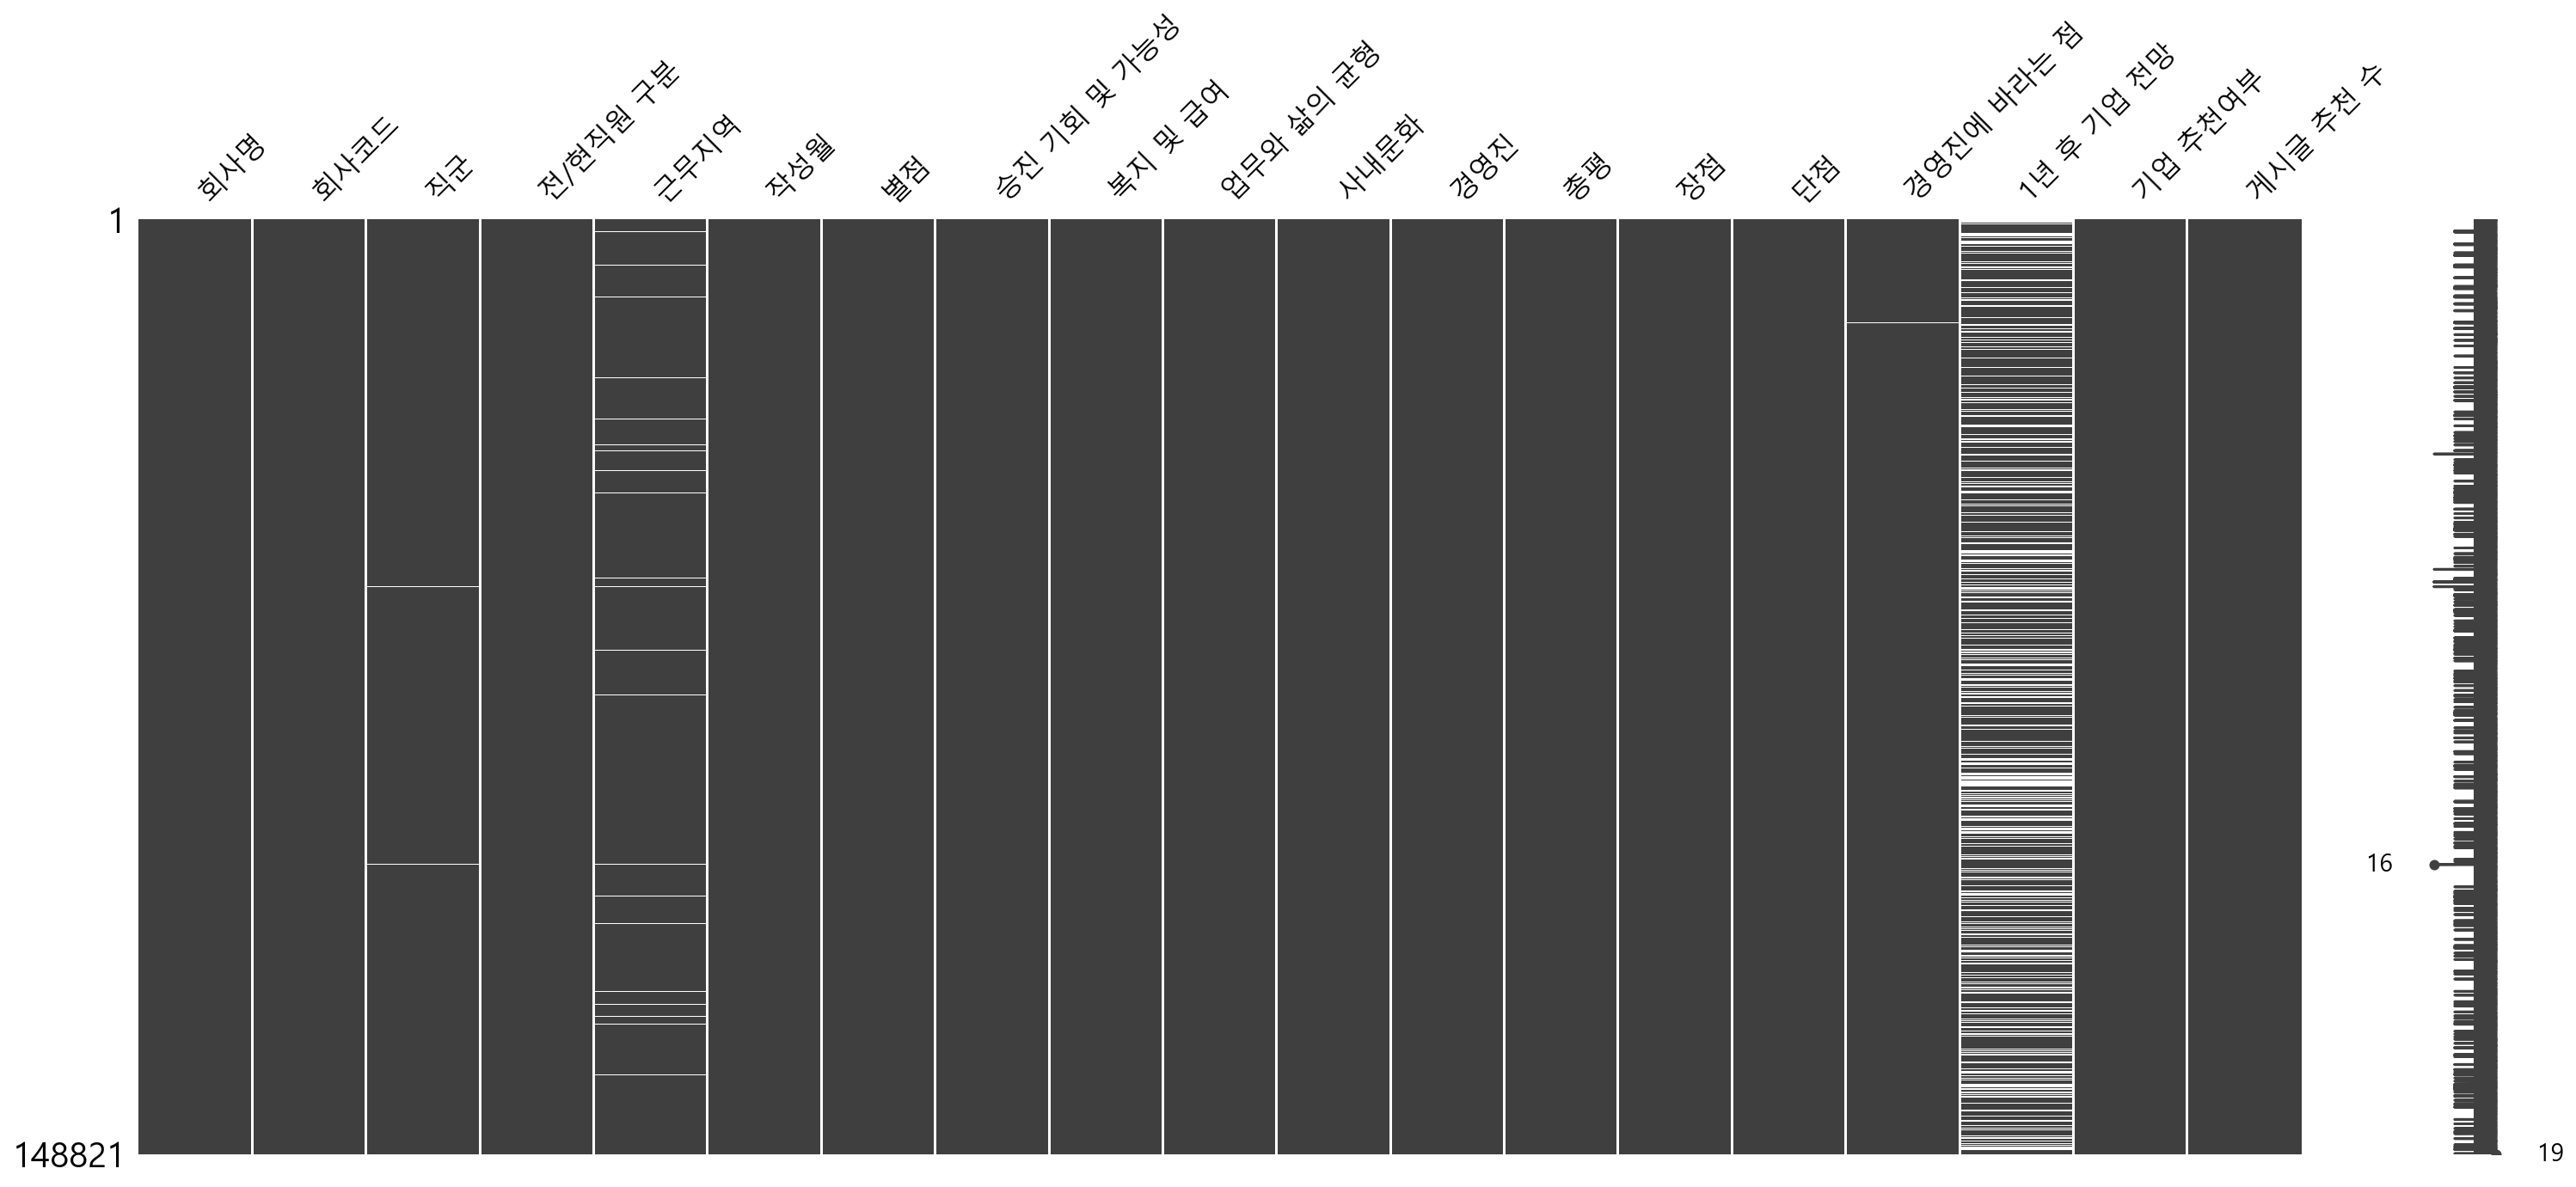

In [27]:
msno.matrix(df);

- Í≤∞Ï∏°Ïπò unknown ÎåÄÏ≤¥

In [28]:
df = df.fillna('unknown')
df.isnull().sum()

ÌöåÏÇ¨Î™Ö            0
ÌöåÏÇ¨ÏΩîÎìú           0
ÏßÅÍµ∞             0
Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ       0
Í∑ºÎ¨¥ÏßÄÏó≠           0
ÏûëÏÑ±Ïõî            0
Î≥ÑÏ†ê             0
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±    0
Î≥µÏßÄ Î∞è Í∏âÏó¨        0
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï      0
ÏÇ¨ÎÇ¥Î¨∏Ìôî           0
Í≤ΩÏòÅÏßÑ            0
Ï¥ùÌèâ             0
Ïû•Ï†ê             0
Îã®Ï†ê             0
Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê     0
1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù     0
Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä        0
Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò       0
dtype: int64

### Ï§ëÎ≥µÍ∞í

- Ïä§ÌÅ¨Î†àÏù¥Ìïë Í≥ºÏ†ïÏóêÏÑú Ï§ëÎ≥µÍ∞í 8Í∞ú Î∞úÏÉù -> Ï†úÍ±∞

In [29]:
df.duplicated().sum()

8

In [30]:
# Ï§ëÎ≥µÍ∞í Ï†úÍ±∞
print('Ï†úÍ±∞ Ï†Ñ:',df.shape)
df = df.drop_duplicates()
print('Ï†úÍ±∞ ÌõÑ:',df.shape)

Ï†úÍ±∞ Ï†Ñ: (148821, 19)
Ï†úÍ±∞ ÌõÑ: (148813, 19)


- ÌïòÍ∏∞ Ï¥ù 4Í∞ú Í∏∞ÏóÖÏóê ÎåÄÌïòÏó¨ ÌöåÏÇ¨ÏΩîÎìúÎ•º Ï†ëÎØ∏ÏÇ¨Î°ú Î∂ôÏó¨ Ï§ëÎ≥µÍ∞íÎ¨∏Ï†ú Ìï¥Í≤∞
    - Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò -> Í∏∞ÏóÖÎ¶¨Ïä§Ìä∏ÏôÄ ÎòëÍ∞ôÏùÄ Î¨∏Ï†ú
    - (Ï£º)Ïú†ÏãúÏä§, Ïú†ÏãúÏä§(Ï£º) -> (Ï£º) Ï†úÍ±∞ÎêòÎ©¥ÏÑú Ìï¥Îãπ Î¨∏Ï†ú Î∞úÏÉù

In [31]:
grouped = df.groupby(['ÌöåÏÇ¨Î™Ö','ÌöåÏÇ¨ÏΩîÎìú']).size().reset_index().drop(0, axis=1)
grouped[grouped.duplicated('ÌöåÏÇ¨Î™Ö', keep=False)]

ÌöåÏÇ¨Î™Ö   ÌöåÏÇ¨ÏΩîÎìú
126  Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò  86935
127  Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò  89732
759     Ïú†ÏãúÏä§  59945
760     Ïú†ÏãúÏä§  59946

In [32]:
# Ï§ëÎ≥µÍ∞íÎêòÎäî ÌöåÏÇ¨Î™ÖÏóê Ï†ëÎØ∏ÏÇ¨ Ï∂îÍ∞Ä 
df['ÌöåÏÇ¨Î™Ö'] = df.apply(lambda x: x['ÌöåÏÇ¨Î™Ö']+'_'+ str(x['ÌöåÏÇ¨ÏΩîÎìú']) if x['ÌöåÏÇ¨Î™Ö']=='Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò' or x['ÌöåÏÇ¨Î™Ö']=='Ïú†ÏãúÏä§' else x['ÌöåÏÇ¨Î™Ö'], axis=1)

In [33]:
grouped = df.groupby(['ÌöåÏÇ¨Î™Ö','ÌöåÏÇ¨ÏΩîÎìú']).size().reset_index().drop(0, axis=1)
grouped[grouped.duplicated('ÌöåÏÇ¨Î™Ö', keep=False)]

Empty DataFrame
Columns: [ÌöåÏÇ¨Î™Ö, ÌöåÏÇ¨ÏΩîÎìú]
Index: []

In [34]:
# Î≥ÄÍ≤ΩÎêú ÌöåÏÇ¨Î™Ö ÌôïÏù∏
df[df['ÌöåÏÇ¨Î™Ö'].str.contains('Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò')]['ÌöåÏÇ¨Î™Ö'].unique()

array(['Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò_89732', 'Îç∞Ïù¥ÌÉÄÏÜîÎ£®ÏÖò_86935'], dtype=object)

In [35]:
df[df['ÌöåÏÇ¨Î™Ö'].str.contains('Ïú†ÏãúÏä§')]['ÌöåÏÇ¨Î™Ö'].unique()

array(['Ïú†ÏãúÏä§_59946', 'Ïú†ÏãúÏä§_59945'], dtype=object)

### Í∏∞ÌÉÄ 
- `ÌöåÏÇ¨ÏΩîÎìú` Ï†úÍ±∞

In [36]:
df.drop('ÌöåÏÇ¨ÏΩîÎìú', axis=1, inplace=True)

## Ï†ÑÏ≤òÎ¶¨

### `ÏßÅÍµ∞`

- 'IT-Ïù∏ÌÑ∞ÎÑ∑' -> 'IT/Ïù∏ÌÑ∞ÎÑ∑' ÏúºÎ°ú ÌÜµÏùº

In [37]:
df['ÏßÅÍµ∞'].unique()

array(['ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨', 'ÏòÅÏóÖ/Ï†úÌú¥', 'ÎîîÏûêÏù∏', 'IT/Ïù∏ÌÑ∞ÎÑ∑', 'ÏÑúÎπÑÏä§/Í≥†Í∞ùÏßÄÏõê', 'Í≤ΩÏòÅ/Í∏∞Ìöç/Ïª®ÏÑ§ÌåÖ',
       'Ïú†ÌÜµ/Î¨¥Ïó≠', 'ÏÉùÏÇ∞Í¥ÄÎ¶¨/ÌíàÏßàÍ¥ÄÎ¶¨', 'ÍµêÏú°', 'ÎØ∏ÎîîÏñ¥/ÌôçÎ≥¥', 'Ïù∏ÏÇ¨/Ï¥ùÎ¨¥', 'Í∏àÏúµ/Ïû¨Î¨¥', 'ÏÉùÏÇ∞/Ï†úÏ°∞',
       'Ï†ÑÎ¨∏ÏßÅ', 'Î≤ïÎ•†/Î≤ïÎ¨¥', 'Í∏∞ÌÉÄ', 'Ïó∞Íµ¨Í∞úÎ∞ú', 'ÏóîÏßÄÎãàÏñ¥ÎßÅ', 'ÏùòÏïΩ', 'ÌäπÏàòÍ≥ÑÏ∏µ/Í≥µÍ≥µ', 'IT-Ïù∏ÌÑ∞ÎÑ∑',
       'unknown'], dtype=object)

In [38]:
df['ÏßÅÍµ∞'] = df['ÏßÅÍµ∞'].apply(lambda x:x.replace('-','/') if not isinstance(x, float) else x)
df['ÏßÅÍµ∞'].unique()

array(['ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨', 'ÏòÅÏóÖ/Ï†úÌú¥', 'ÎîîÏûêÏù∏', 'IT/Ïù∏ÌÑ∞ÎÑ∑', 'ÏÑúÎπÑÏä§/Í≥†Í∞ùÏßÄÏõê', 'Í≤ΩÏòÅ/Í∏∞Ìöç/Ïª®ÏÑ§ÌåÖ',
       'Ïú†ÌÜµ/Î¨¥Ïó≠', 'ÏÉùÏÇ∞Í¥ÄÎ¶¨/ÌíàÏßàÍ¥ÄÎ¶¨', 'ÍµêÏú°', 'ÎØ∏ÎîîÏñ¥/ÌôçÎ≥¥', 'Ïù∏ÏÇ¨/Ï¥ùÎ¨¥', 'Í∏àÏúµ/Ïû¨Î¨¥', 'ÏÉùÏÇ∞/Ï†úÏ°∞',
       'Ï†ÑÎ¨∏ÏßÅ', 'Î≤ïÎ•†/Î≤ïÎ¨¥', 'Í∏∞ÌÉÄ', 'Ïó∞Íµ¨Í∞úÎ∞ú', 'ÏóîÏßÄÎãàÏñ¥ÎßÅ', 'ÏùòÏïΩ', 'ÌäπÏàòÍ≥ÑÏ∏µ/Í≥µÍ≥µ', 'unknown'],
      dtype=object)

### `ÏûëÏÑ±Ïõî`
- Î∂àÎüâ Îç∞Ïù¥ÌÑ∞ -> Í≤∞Ï∏°Ïπò Î≥ÄÌôò 
    - 'Ïù¥ Í∏∞ÏóÖÏùò ÎåìÍ∏Ä' -> 'unknown'

In [39]:
df['ÏûëÏÑ±Ïõî'].unique()

array(['2022. 04', '2022. 03', '2022. 02', '2022. 01', '2021. 12',
       '2021. 11', '2021. 10', '2021. 09', '2021. 08', '2021. 07',
       '2021. 06', '2021. 05', '2021. 04', '2021. 03', '2021. 02',
       '2021. 01', '2020. 12', '2020. 11', '2020. 10', '2020. 09',
       '2020. 08', '2020. 07', '2020. 06', '2020. 05', '2020. 04',
       '2020. 03', '2020. 02', '2020. 01', '2019. 12', '2019. 11',
       '2019. 10', '2019. 09', '2019. 08', '2019. 07', '2019. 06',
       '2019. 05', '2019. 04', '2019. 03', '2019. 02', '2019. 01',
       '2018. 12', '2018. 11', '2018. 10', '2018. 09', '2018. 08',
       '2018. 07', '2018. 06', '2018. 05', '2018. 04', '2018. 03',
       '2018. 02', '2018. 01', '2017. 12', '2017. 11', '2017. 10',
       '2017. 09', '2017. 08', '2017. 07', '2017. 06', '2017. 05',
       '2017. 04', '2017. 03', '2017. 02', '2017. 01', '2016. 12',
       '2016. 11', '2016. 10', '2016. 09', '2016. 08', '2016. 07',
       '2016. 06', '2016. 05', '2016. 04', '2016. 03', '2016. 

In [40]:
# Ïä§ÌÅ¨Î†àÏù¥Ìïë ÏóêÎü¨ Ï†úÍ±∞
df['ÏûëÏÑ±Ïõî'] = np.where(df['ÏûëÏÑ±Ïõî']=='Ïù¥ Í∏∞ÏóÖÏùò ÎåìÍ∏Ä', 'unknown', df['ÏûëÏÑ±Ïõî'])
df['ÏûëÏÑ±Ïõî'].unique()

array(['2022. 04', '2022. 03', '2022. 02', '2022. 01', '2021. 12',
       '2021. 11', '2021. 10', '2021. 09', '2021. 08', '2021. 07',
       '2021. 06', '2021. 05', '2021. 04', '2021. 03', '2021. 02',
       '2021. 01', '2020. 12', '2020. 11', '2020. 10', '2020. 09',
       '2020. 08', '2020. 07', '2020. 06', '2020. 05', '2020. 04',
       '2020. 03', '2020. 02', '2020. 01', '2019. 12', '2019. 11',
       '2019. 10', '2019. 09', '2019. 08', '2019. 07', '2019. 06',
       '2019. 05', '2019. 04', '2019. 03', '2019. 02', '2019. 01',
       '2018. 12', '2018. 11', '2018. 10', '2018. 09', '2018. 08',
       '2018. 07', '2018. 06', '2018. 05', '2018. 04', '2018. 03',
       '2018. 02', '2018. 01', '2017. 12', '2017. 11', '2017. 10',
       '2017. 09', '2017. 08', '2017. 07', '2017. 06', '2017. 05',
       '2017. 04', '2017. 03', '2017. 02', '2017. 01', '2016. 12',
       '2016. 11', '2016. 10', '2016. 09', '2016. 08', '2016. 07',
       '2016. 06', '2016. 05', '2016. 04', '2016. 03', '2016. 

- ÎÖÑ.Ïõî -> ÎÖÑÎèÑ onlyÎ°ú Ï≤òÎ¶¨
- Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω 
    - 'ÏûëÏÑ±Ïõî' -> 'ÏûëÏÑ±ÎÖÑÎèÑ'

In [41]:
df['ÏûëÏÑ±Ïõî'] = df['ÏûëÏÑ±Ïõî'].apply(lambda x:x.split('. ')[0])
df = df.rename(columns={'ÏûëÏÑ±Ïõî':'ÏûëÏÑ±ÎÖÑÎèÑ'})
df.head(1)

ÌöåÏÇ¨Î™Ö        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠  ÏûëÏÑ±ÎÖÑÎèÑ  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  \
index                                                                          
0      Ìã∞Î™¨  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2022   3            5        5          5   

       ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ                         Ï¥ùÌèâ                                Ïû•Ï†ê  \
index                                                                           
0         5    5  Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïûò Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò ÌöåÏÇ¨  ÏÇ¨ÎÇ¥ Ïπ¥Ìéò,ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ Îì± ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®   

                                                     Îã®Ï†ê  \
index                                                     
0      ÎÇòÎ¶Ñ Í±¥Í∞ï ÏÉùÍ∞ÅÌïòÎäî Ìù°Ïó∞ÏûêÏòÄÏñ¥ÏÑú ÎãπÏãú Ìù°Ïó∞ÌïòÎü¨ ÌïòÎ£®Ïóê 3Î≤àÎßå ÎÇòÍ∞îÎäîÎç∞ ÏúÑÏóêÏÑú ÏßÄÏ†Å Î∞õÏùå   

                   Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä  Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò  
index                                                       
0      Ï¢ãÏùÄ ÏÇ¨ÎÇ¥Î¨∏ÌôîÍ∞Ä ÎßåÎì§Ïñ¥ÏßÄÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå         ÏÑ±Ïû•      Ï∂îÏ≤ú         0

In [42]:
df['ÏûëÏÑ±ÎÖÑÎèÑ'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', 'unknown'], dtype=object)

## Î∂ÑÏÑù

### `ÏßÅÍµ∞`

- IT/Ïù∏ÌÑ∞ÎÑ∑ ÏßÅÍµ∞Ïù¥ Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏûëÏÑ±ÏûêÏùò 58.15% Ï∞®ÏßÄ 
    - ITÏßÅÍµ∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ï†êÏàò Ï∞®Ïù¥ ÏûàÏùÑÍπå?
- Îã§ÏùåÏúºÎ°ú Í≤ΩÏòÅ/Í∏∞Ìöç/Ïª®ÏÑ§ÌåÖ, ÏòÅÏóÖ/Ï†úÌú¥ Ïàú

üî•
- ÏÉÅÏÑ∏ÏßÅÍµ∞Ïù¥ ÎÇòÏò§Î©¥ Î∂ÑÏÑùÏù¥ Îçî Ïö©Ïù¥Ìï†Í≤É Í∞ôÏùÄÎç∞, ÏÉÅÏÑ∏ÌïòÍ≤å Ï†ÅÏúºÎ©¥ ÎàÑÍµ∞ÏßÄ Ï∂îÏ†ÅÏù¥ ÎêòÎãàÍπå ÏÉÅÏÑ∏ÌïòÍ≤å Í∏∞Ïû¨ÌïòÏßÄ Î™ªÌï† Í≤É Í∞ôÎã§. 
- ÏßÅÍµ∞ÏùÑ Í∞ÄÏßúÎ°ú Í∏∞Ïû¨Ìïú Í≤ΩÏö∞ÎèÑ ÏûàÏùÑÍπå?

In [43]:
grouped = pd.DataFrame(df['ÏßÅÍµ∞'].value_counts())
grouped['ÎπÑÏú®(%)'] = df['ÏßÅÍµ∞'].value_counts(normalize=True).round(4)*100
grouped.head(10)

ÏßÅÍµ∞  ÎπÑÏú®(%)
IT/Ïù∏ÌÑ∞ÎÑ∑     86541  58.15
Í≤ΩÏòÅ/Í∏∞Ìöç/Ïª®ÏÑ§ÌåÖ  12138   8.16
ÏòÅÏóÖ/Ï†úÌú¥      10124   6.80
ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨    9725   6.54
ÎîîÏûêÏù∏         7920   5.32
ÏÑúÎπÑÏä§/Í≥†Í∞ùÏßÄÏõê    7364   4.95
ÎØ∏ÎîîÏñ¥/ÌôçÎ≥¥      3141   2.11
Ïù∏ÏÇ¨/Ï¥ùÎ¨¥       1977   1.33
Í∏àÏúµ/Ïû¨Î¨¥       1692   1.14
ÍµêÏú°          1559   1.05

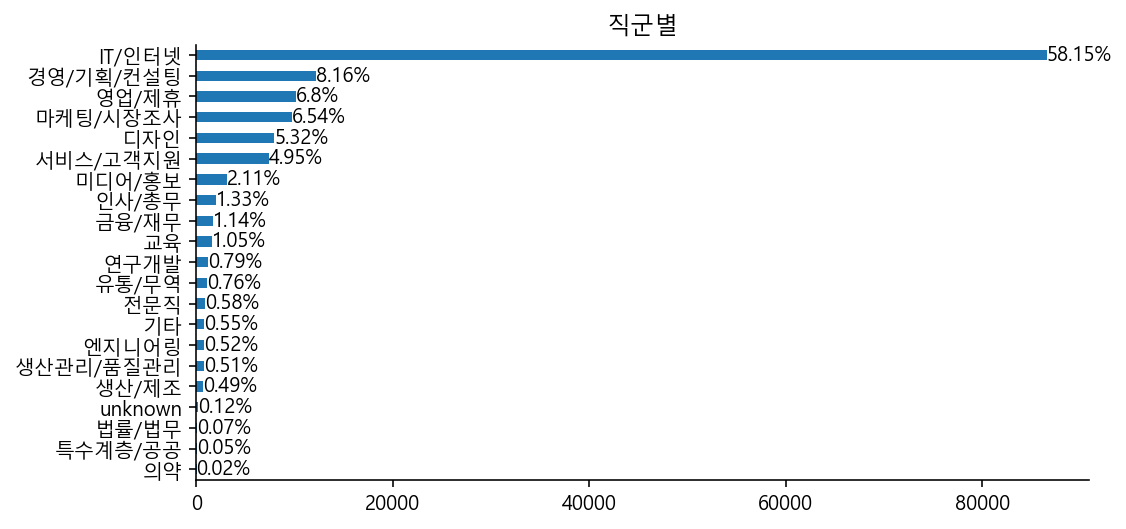

In [44]:
#ÏãúÍ∞ÅÌôî
x = 'ÏßÅÍµ∞'
grouped = df['ÏßÅÍµ∞'].value_counts().sort_values()

plt.figure(figsize=(8,4))
g = grouped.plot(kind='barh')

# ÏàòÏπò Í∏∞ÏûÖ
for bar, val in zip(g.patches, grouped.values):
    g.annotate(f'{round(val/len(df)*100,2)}%', (val, bar.get_y()))

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


plt.title('ÏßÅÍµ∞Î≥Ñ')
plt.show()

- ITÏßÅÍµ∞ vs ÎπÑ ITÏßÅÍµ∞ ÌèâÍ∑† Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÎÇ†ÏßÄ?

In [45]:
# ITÏó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
cond = df['ÏßÅÍµ∞'] == 'IT/Ïù∏ÌÑ∞ÎÑ∑'
df['ITÏó¨Î∂Ä'] = np.where(cond, 'IT', 'ÎπÑIT')
df.head(1)

ÌöåÏÇ¨Î™Ö        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠  ÏûëÏÑ±ÎÖÑÎèÑ  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  \
index                                                                          
0      Ìã∞Î™¨  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2022   3            5        5          5   

       ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ                         Ï¥ùÌèâ                                Ïû•Ï†ê  \
index                                                                           
0         5    5  Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïûò Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò ÌöåÏÇ¨  ÏÇ¨ÎÇ¥ Ïπ¥Ìéò,ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ Îì± ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®   

                                                     Îã®Ï†ê  \
index                                                     
0      ÎÇòÎ¶Ñ Í±¥Í∞ï ÏÉùÍ∞ÅÌïòÎäî Ìù°Ïó∞ÏûêÏòÄÏñ¥ÏÑú ÎãπÏãú Ìù°Ïó∞ÌïòÎü¨ ÌïòÎ£®Ïóê 3Î≤àÎßå ÎÇòÍ∞îÎäîÎç∞ ÏúÑÏóêÏÑú ÏßÄÏ†Å Î∞õÏùå   

                   Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä  Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò ITÏó¨Î∂Ä  
index                                                            
0      Ï¢ãÏùÄ ÏÇ¨ÎÇ¥Î¨∏ÌôîÍ∞Ä ÎßåÎì§Ïñ¥ÏßÄÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå         ÏÑ±Ïû•      Ï∂îÏ≤ú         0  ÎπÑIT

In [46]:
# count plot Ìï®Ïàò
def countplot(hue):
    g = sns.countplot(data=df, x=hue)

    for p in g.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        g.annotate(percentage, (x-0.4, y), ha='center', va='bottom')
    
    sns.despine()
    plt.title(f'{hue}Ïóê Îî∞Î•∏ ÌèâÍ∑† Ï†êÏàò')
    plt.show()

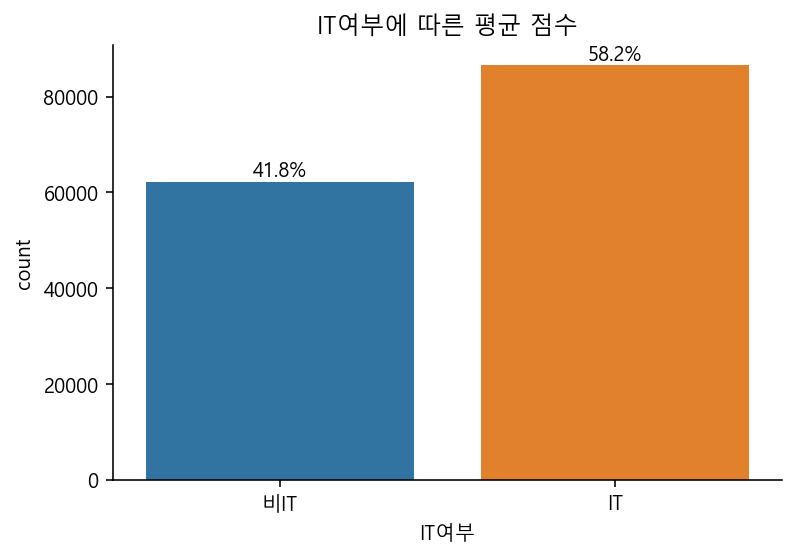

In [47]:
countplot('ITÏó¨Î∂Ä')

- histplot
    - Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Ï†ï

In [48]:
# histplot ÏÉùÏÑ±Ìï®Ïàò ÏÉùÏÑ±
arr_scores = ['Î≥ÑÏ†ê', 'ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±', 'Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî', 'Í≤ΩÏòÅÏßÑ']
def histplot(hue=None):
    fig,ax = plt.subplots(2, 3, figsize=(15,7))
    for idx, col in enumerate(arr_scores):
        x = col
        r,c = idx//3, idx%3
        g = sns.histplot(x=x, data=df, discrete=True, hue=hue, ax=ax[r,c], 
                         stat="density", common_norm=False)
        if hue == None: g.set_title(col)
        else: g.set_title(f'{hue}Ïóê Îî∞Î•∏ - {col} Î∂ÑÌè¨')
        
    plt.tight_layout()
    plt.show()

- 6Í∞ÄÏßÄ Ìï≠Î™©Ïóê ÎåÄÌïú Ï†êÏàòÎ∂ÑÌè¨
    1. Î™®Îì† Ìï≠Î™©ÏóêÏÑú 5Ï†êÏóê ÎåÄÌïú Î∂ÑÌè¨Í∞Ä Í∞ÄÏû• Ï†ÅÎã§. 
    2. Í≤ΩÏòÅÏßÑ Ï†êÏàòÍ∞Ä 1Ï†êÏù¥ Îß§Ïö∞ ÎÜíÎã§.
        - ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïûê Ïó∞Î†πÎåÄÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏûàÏùÑÍπå?
        - 20~30ÎåÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Ï£º ÏÇ¨Ïö©ÏûêÎ°ú Ï∂îÏ∏°ÎêòÎäîÎç∞ Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Î∂àÎßåÏù¥ ÎßéÏïÑÏÑú?

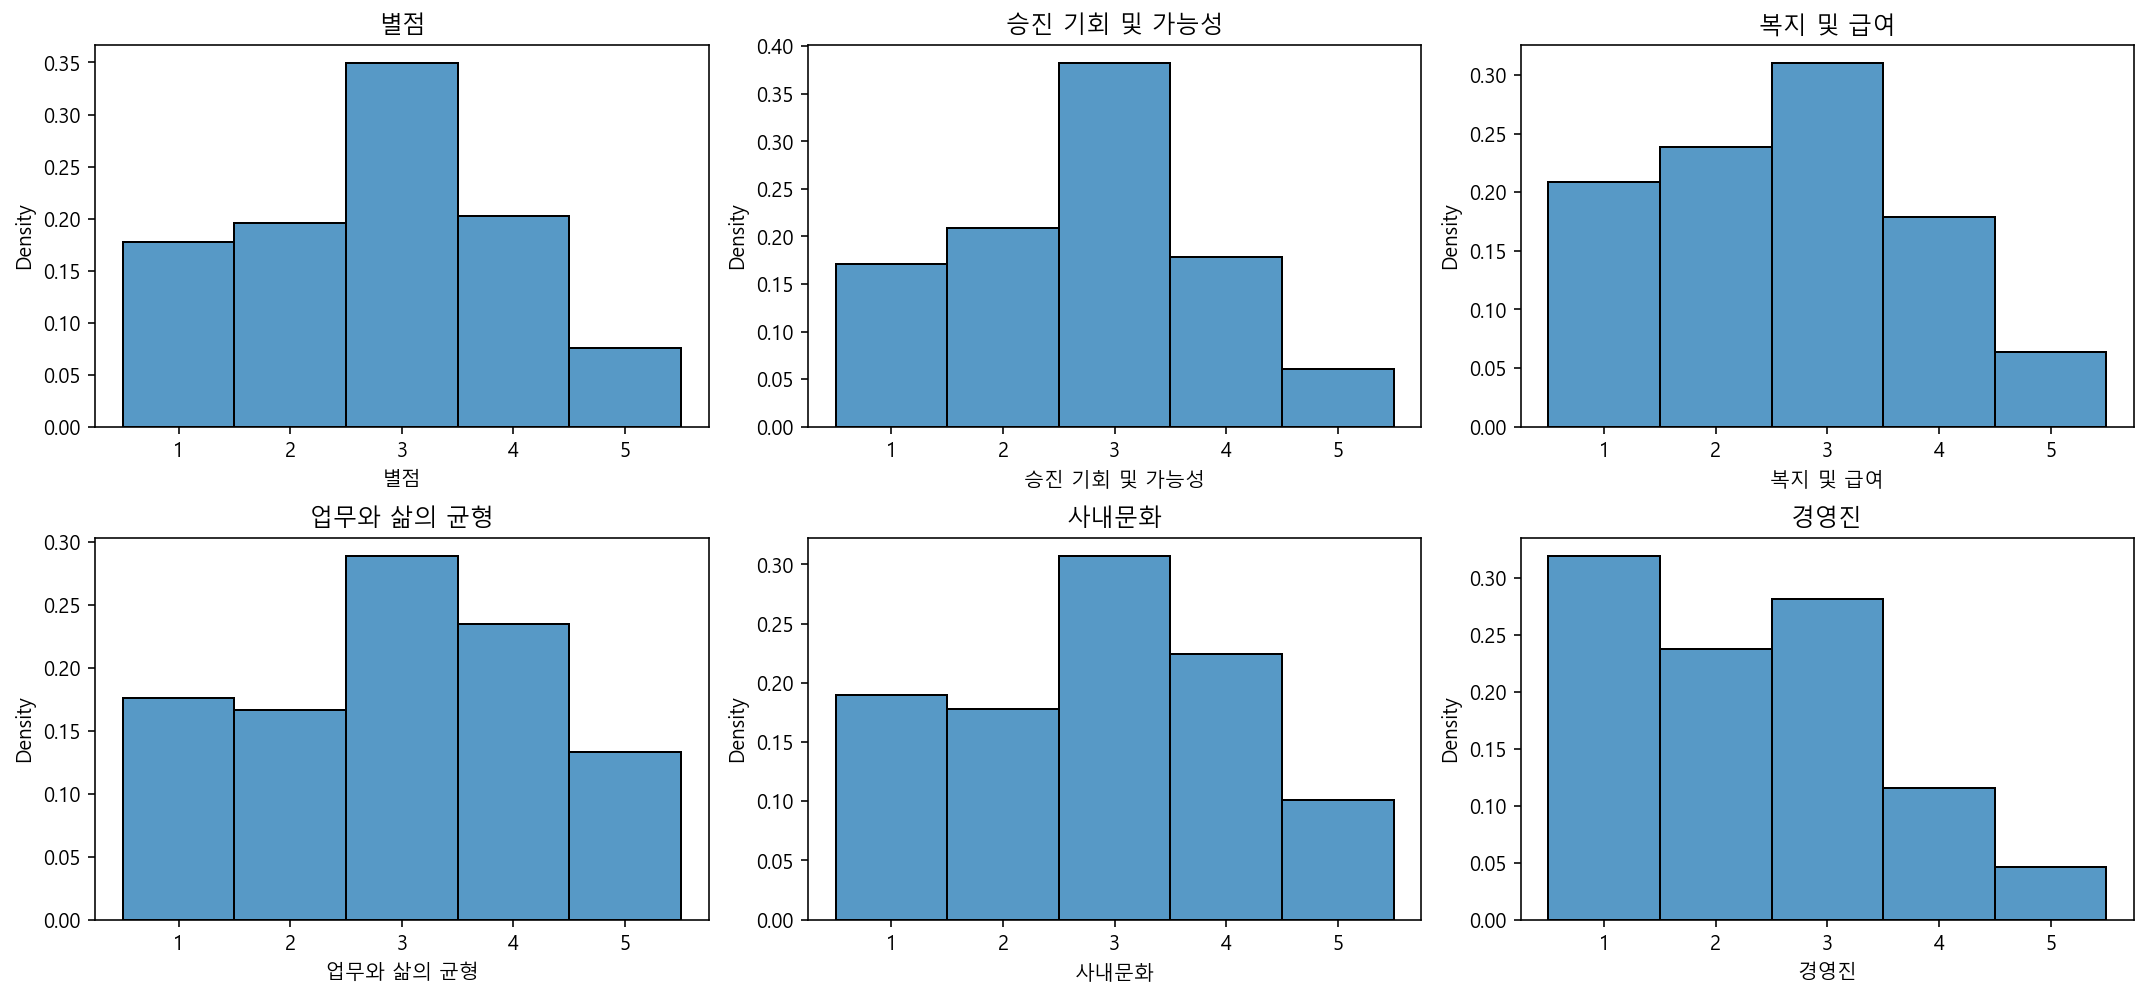

In [49]:
histplot()

- ITÏßÅÍµ∞ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ï†êÏàò Î∂ÑÌè¨
    - IT ÏßÅÍµ∞
        - Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Î∂àÎßå(1~2Ï†ê)Ïù¥ ÎπÑ ITÏßÅÍµ∞Ïóê ÎπÑÌï¥ Îçî ÌÅ¨Îã§
    - ÎπÑITÏßÅÍµ∞
        - ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ± / ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï 2Í∞ÄÏßÄ Ìï≠Î™©ÏóêÏÑú 1Ï†êÏùò Î∂ÑÌè¨Í∞Ä Îçî ÌÅ¨Îã§.

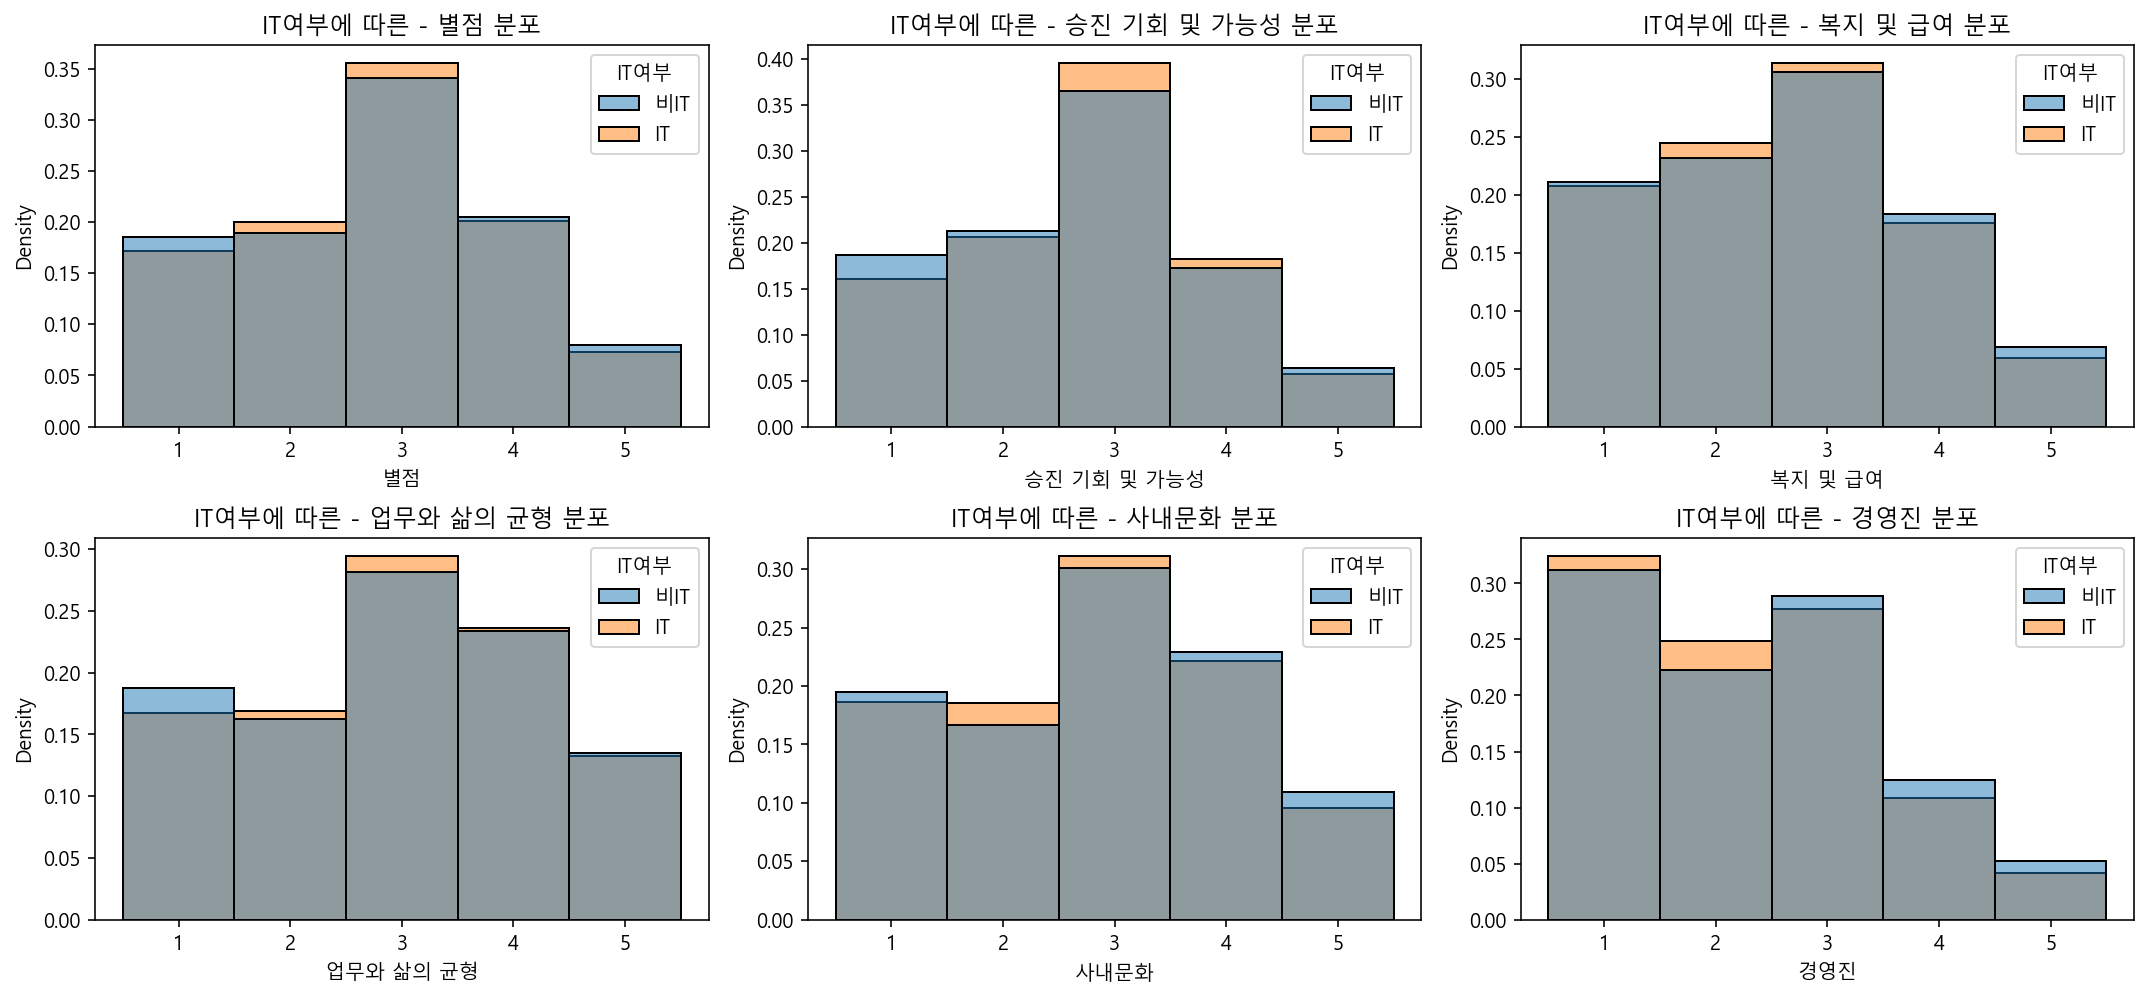

In [50]:
histplot('ITÏó¨Î∂Ä')

In [51]:
# melting table Ìï®Ïàò ÏÉùÏÑ± 
arr_scores = ['Î≥ÑÏ†ê','ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±','Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî','Í≤ΩÏòÅÏßÑ']
def melting_table(id_vars, value_vars=arr_scores):
    tmp = df[[id_vars]+value_vars]
    melted = tmp.melt(id_vars=id_vars, value_vars=value_vars, var_name='Ìï≠Î™©', value_name='Ï†êÏàò')
    return melted

In [52]:
melted = melting_table('ITÏó¨Î∂Ä')
grouped = melted.groupby(['ITÏó¨Î∂Ä','Ìï≠Î™©'])['Ï†êÏàò'].mean().reset_index()
grouped.head(6)

ITÏó¨Î∂Ä           Ìï≠Î™©        Ï†êÏàò
0   IT          Í≤ΩÏòÅÏßÑ  2.295918
1   IT           Î≥ÑÏ†ê  2.803226
2   IT      Î≥µÏßÄ Î∞è Í∏âÏó¨  2.635814
3   IT         ÏÇ¨ÎÇ¥Î¨∏Ìôî  2.854635
4   IT  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  2.771507
5   IT    ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  2.997377

- point plot
    - Î≥ÑÏ†êÏùò Ï∞®Ïù¥Îäî ÌÅ¨Í≤å Î≥¥Ïù¥ÏßÄ ÏïäÍ≥†
    - ITÏßÅÍµ∞Ïùò ÏäπÏßÑÍ∏∞Ìöå Î∞è ÏõåÎùºÎ∞∏ ÌèâÍ∑†Ï†êÏàòÍ∞Ä ÎÜíÍ≥†,
    - Î≥µÏßÄ Î∞è Í∏âÏó¨, ÏÇ¨ÎÇ¥Î¨∏Ìôî, Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Ï†êÏàòÎäî ÎÇÆÎã§.
        - ITÏßÅÍµ∞Ïùò Í∏âÏó¨Í∞Ä ÎπÑITÏßÅÍµ∞Ïóê ÎπÑÌï¥ ÎÜíÏùÑÌÖêÎç∞ Î≥µÏßÄ Î∞è Í∏âÏó¨Ï†êÏàòÍ∞Ä Îçî ÎÇÆÏùÄÍ≤å ÏùòÏô∏Îã§.
        - IT vs ÎπÑIT Ïó∞Î¥â ÎπÑÍµê ÌÖåÏù¥Î∏î Íµ¨Ìï† Ïàò ÏûàÏúºÎ†§ÎÇò
        - ÏÇ¨ÎÇ¥Î¨∏ÌôîÏôÄ Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Ï†êÏàòÍ∞Ä Îçî ÎÇÆÏùÄÍ±¥ Ïôú Í∑∏Îü∞Í∞Ä?

In [83]:
# point plot ÏÉùÏÑ±Ìï®Ïàò
def pointplot(hue=None):
    melted = melting_table(hue)
    grouped = melted.groupby([hue,'Ìï≠Î™©'])['Ï†êÏàò'].mean().reset_index()
    g = sns.pointplot(data=grouped, y='Ï†êÏàò',x='Ìï≠Î™©', hue=hue, order=arr_scores)
    plt.title(f'{hue}Ïóê Îî∞Î•∏ ÌèâÍ∑† Ï†êÏàò')
    plt.xticks(rotation=20)
    sns.despine()
    plt.show()

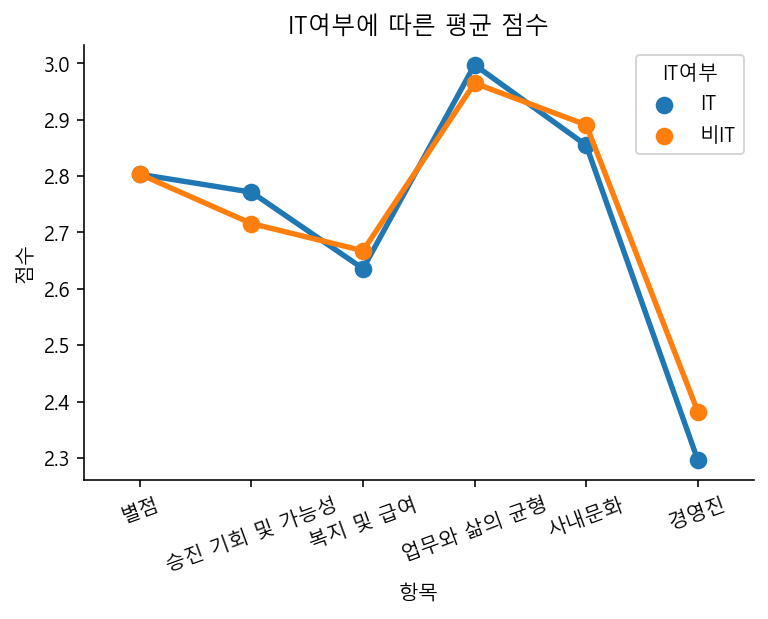

In [84]:
pointplot('ITÏó¨Î∂Ä')

- radar plot
    - ÎπÑIT ÏßÅÍµ∞Ïùò Í≤ΩÏòÅÏßÑ Ï†êÏàòÍ∞Ä ÏÇ¥Ïßù Îçî ÎÜíÏïÑÎ≥¥Ïù¥Í∏¥ ÌïòÏßÄÎßå
    - point plotÏúºÎ°ú Î≥ºÎïåÎ≥¥Îã§ Îëê Í∑∏Î£πÍ∞ÑÏùò ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏïàÎ≥¥Ïù∏Îã§.
    - ÌÜµÍ≥ÑÍ≤ÄÏ†ïÏúºÎ°ú ÎπÑÍµê Ìï¥Î≥¥Ïûê    

In [55]:
# radar plot ÏÉùÏÑ±Ìï®Ïàò 
def radarplot(hue=None):
    melted = melting_table(hue) # meltingÌï®Ïàò ÏÇ¨Ïö©
    grouped = melted.groupby([hue,'Ìï≠Î™©'])['Ï†êÏàò'].mean().reset_index().sort_values('Ìï≠Î™©')

    categories = list(grouped['Ìï≠Î™©'].unique())
#     categories.remove('Î≥ÑÏ†ê')
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2*np.pi, num=len(categories))
    
    plt.figure(figsize=(5,5))
    ax = plt.subplot(polar=True)

    plt.xticks(label_loc, labels=categories, fontsize=10)
    
    for h_val in grouped[hue].unique():
        cond = grouped[hue] == h_val
        grade = list(grouped[cond]['Ï†êÏàò'])
        grade = [*grade, grade[0]]
        
        ax.plot(label_loc, grade, label=h_val, lw=1, marker='o', ms=4)
        ax.fill(label_loc, grade, alpha=0.1)
    
    ax.legend(loc='center')
    ax.set_title(f'{hue}Ïóê Îî∞Î•∏ ÌèâÍ∑† Ï†êÏàò', fontsize=13)


    plt.show()

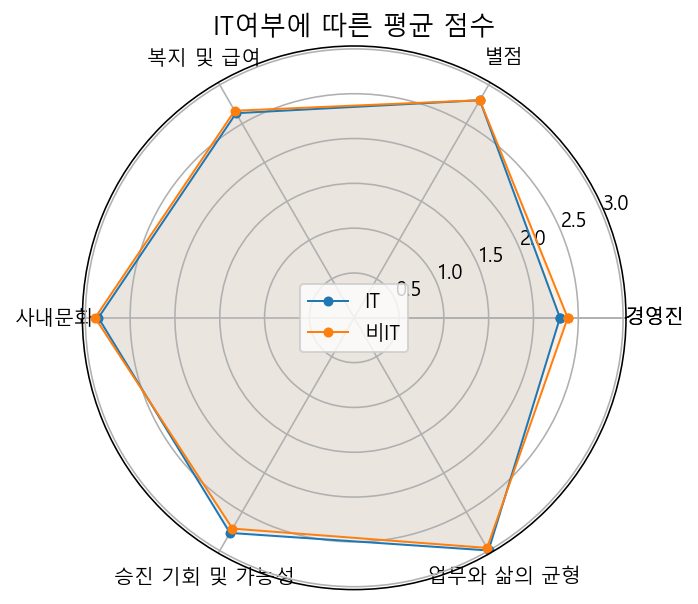

In [56]:
radarplot('ITÏó¨Î∂Ä')

- ÎπÑ Î™®ÏàòÏ†Å Í≤ÄÏ†ï
    - Wilcoxon-Mann-Whitney
    - Î≥ÑÏ†êÏùò Í≤ΩÏö∞, Î≤îÏ£º-ÏàúÏÑú ÏûêÎ£åÌòï
    - Ï∞∏Í≥† - https://bioinformaticsandme.tistory.com/111

In [57]:
# # levene test Ìï®Ïàò ÏÑ§Ï†ï (Î¨¥Ïãú - Î™®ÏàòÍ≤ÄÏ†ïÏö©)
# def levene(hue_var, hue_val):
#     # Í∑∏Î£π Î∂ÑÌï†
#     cond = df[hue_var] == hue_val
#     df_a = df[cond][arr_scores]
#     df_b = df[~cond][arr_scores]
    
#     # Ï†êÏàòÌï≠Î™©Î≥Ñ test
#     for col in arr_scores:
#         lev = stats.levene(df_a[col], df_b[col])
#         print(col)
#         if list(lev)[1] < 0.05: print('H1 Ï±ÑÌÉù - Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§.')
#         elif list(lev)[1] > 0.95: print('H0 Ï±ÑÌÉù  - Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞ôÎã§.')
#         else: print('Îëê ÏßëÎã®Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÎã§.')
#         print(lev)
#         print('====='*15)   

In [58]:
# # Í∞ÄÏÑ§Í≤ÄÏ†ï Ìï®Ïàò ÏÑ§Ï†ï (Î¨¥Ïãú - Î™®ÏàòÍ≤ÄÏ†ïÏö©)
# def ttest(hue_var, hue_val):
#     cond = df[hue_var] == hue_val
#     df_a = df[cond][arr_scores]
#     df_b = df[~cond][arr_scores]
    
#     for col in arr_scores:
#         t_test = stats.ttest_ind(df_a[col], df_b[col], alternative='greater')
#         print(col)
        
#         if list(t_test)[1] < 0.05: print(f'H1 Ï±ÑÌÉù - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§.')
#         elif list(t_test)[1] > 0.95: print(f'H0 Ï±ÑÌÉù - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.')
#         else: print(f'H0 Í∏∞Í∞ÅÏã§Ìå® - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÎã§.')
            
#         print(t_test)
#         print('====='*15)   

In [66]:
# Mann-Whitney U test Ìï®Ïàò ÏÑ§Ï†ï (ÎπÑÎ™®Ïàò Í≤ÄÏ†ï)
def mwutest(hue_var, hue_val, alter='greater'):
    cond = df[hue_var] == hue_val
    df_a = df[cond][arr_scores]
    df_b = df[~cond][arr_scores]
    
    for col in arr_scores:
        mwut = mannwhitneyu(df_a[col], df_b[col], alternative=alter)
        print(col)
        
        if alter == 'greater': a,b = 'ÌÅ¨Îã§','ÏûëÎã§'
        elif alter == 'less': a,b = 'ÏûëÎã§','ÌÅ¨Îã§'
            
        if list(mwut)[1] < 0.05: print(f'H1 Ï±ÑÌÉù - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî {a}.')
        elif list(mwut)[1] > 0.95: print(f'H0 Ï±ÑÌÉù - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî {b}.')
        else: print(f'H0 Í∏∞Í∞ÅÏã§Ìå® - {hue_val} Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî {a}Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÎã§.')
            
        print(mwut)
        print('====='*15)   

In [69]:
mwutest('ITÏó¨Î∂Ä', 'IT', 'greater')

Î≥ÑÏ†ê
H0 Í∏∞Í∞ÅÏã§Ìå® - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÎã§.
MannwhitneyuResult(statistic=2692634900.5, pvalue=0.5952181241487665)
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±
H1 Ï±ÑÌÉù - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§.
MannwhitneyuResult(statistic=2774009082.0, pvalue=2.4689798336391016e-24)
Î≥µÏßÄ Î∞è Í∏âÏó¨
H0 Ï±ÑÌÉù - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2657229939.0, pvalue=0.9999987221967673)
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï
H1 Ï±ÑÌÉù - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§.
MannwhitneyuResult(statistic=2728951477.0, pvalue=7.888517337203747e-06)
ÏÇ¨ÎÇ¥Î¨∏Ìôî
H0 Ï±ÑÌÉù - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2647650958.5, pvalue=0.9999999981397516)
Í≤ΩÏòÅÏßÑ
H0 Ï±ÑÌÉù - IT Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2591359137.0, pvalue=1.0)


### `Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ`

- Ï†ÑÏßÅÏõêÏùò Í≤åÏãúÍ∏ÄÏàòÍ∞Ä Îçî ÎßéÎã§.
- ÌòÑÏßÅÏõêÏù¥ Í∏∞ÏóÖÎ¶¨Î∑∞Î•º ÏûëÏÑ±ÌïòÎäî Í≤ΩÏö∞Îäî Ïñ∏Ï†ú?

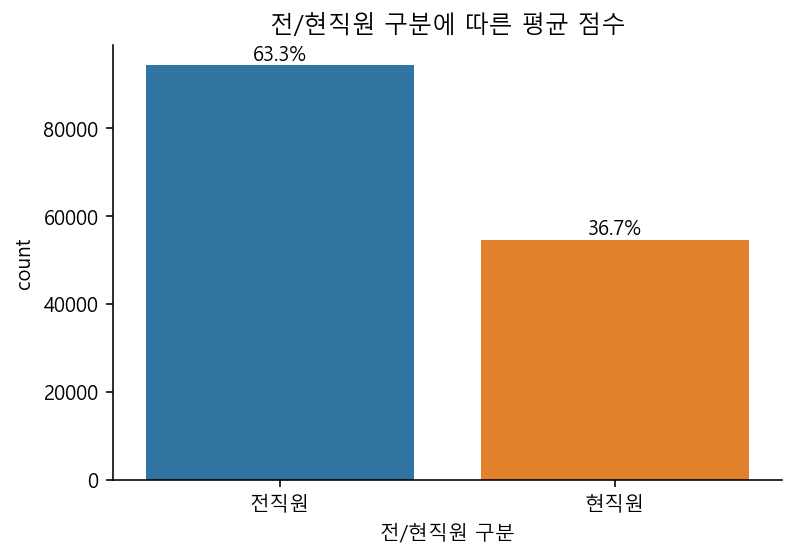

In [70]:
countplot('Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ')

- Í∞ÄÏÑ§ : Ï†ÑÏßÅÏõêÏù¥ ÌòÑÏßÅÏõêÏóê ÎπÑÌï¥ Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§.

- histplot
    - Ï†ÑÏßÅÏõêÏùò Ï†êÏàòÎ∂ÑÌè¨Í∞Ä ÌòÑÏßÅÏõêÎ≥¥Îã§ ÎÇÆÎã§.
    - Í∏∞ÏóÖÎ¶¨Î∑∞ ÏÇ¨Ïù¥Ìä∏ Ïù¥Ïö©Ïûê?
        1. Ï∑®ÏóÖÏ§ÄÎπÑ 
            - ÌïôÏÉù(Î¨¥Î£åÏù¥Ïö© Í∞ÄÎä•) or Ïú†Î£åÌîåÎûú Ïù¥Ïö©Ïûê -> Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ x
        2. Ìá¥ÏÇ¨ ÌõÑ Ïù¥ÏßÅÏ§ÄÎπÑ(Ï†ÑÏßÅÏõê) or Ïû¨ÏßÅ Ï§ë Ïù¥ÏßÅÏ§ÄÎπÑ (ÌòÑÏßÅÏõê)
            - Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞ ÏûëÏÑ±Ïãú 1ÎÖÑÍ∞Ñ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏Í∞ÄÎä•
        3. Ïû¨ÏßÅ Ï§ë (ÌòÑÏßÅÏõê)
            - ÏàúÏàòÌïòÍ≤å Îã§Î•∏ ÌöåÏÇ¨Ïùò Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Ïã∂Ïñ¥ÏÑú
    - ÏÇ¨Ïù¥Ìä∏ ÌäπÏÑ±ÏÉÅ ÌöåÏÇ¨Ïóê ÎßåÏ°±ÌïòÎ©∞ Îã§ÎãàÎäî ÏÇ¨ÎûåÏù¥ Î¶¨Î∑∞Î•º ÏûëÏÑ±ÌïòÍ∏∞ Î≥¥Îã§Îäî, Î∂àÎßåÏù¥ Ïûà

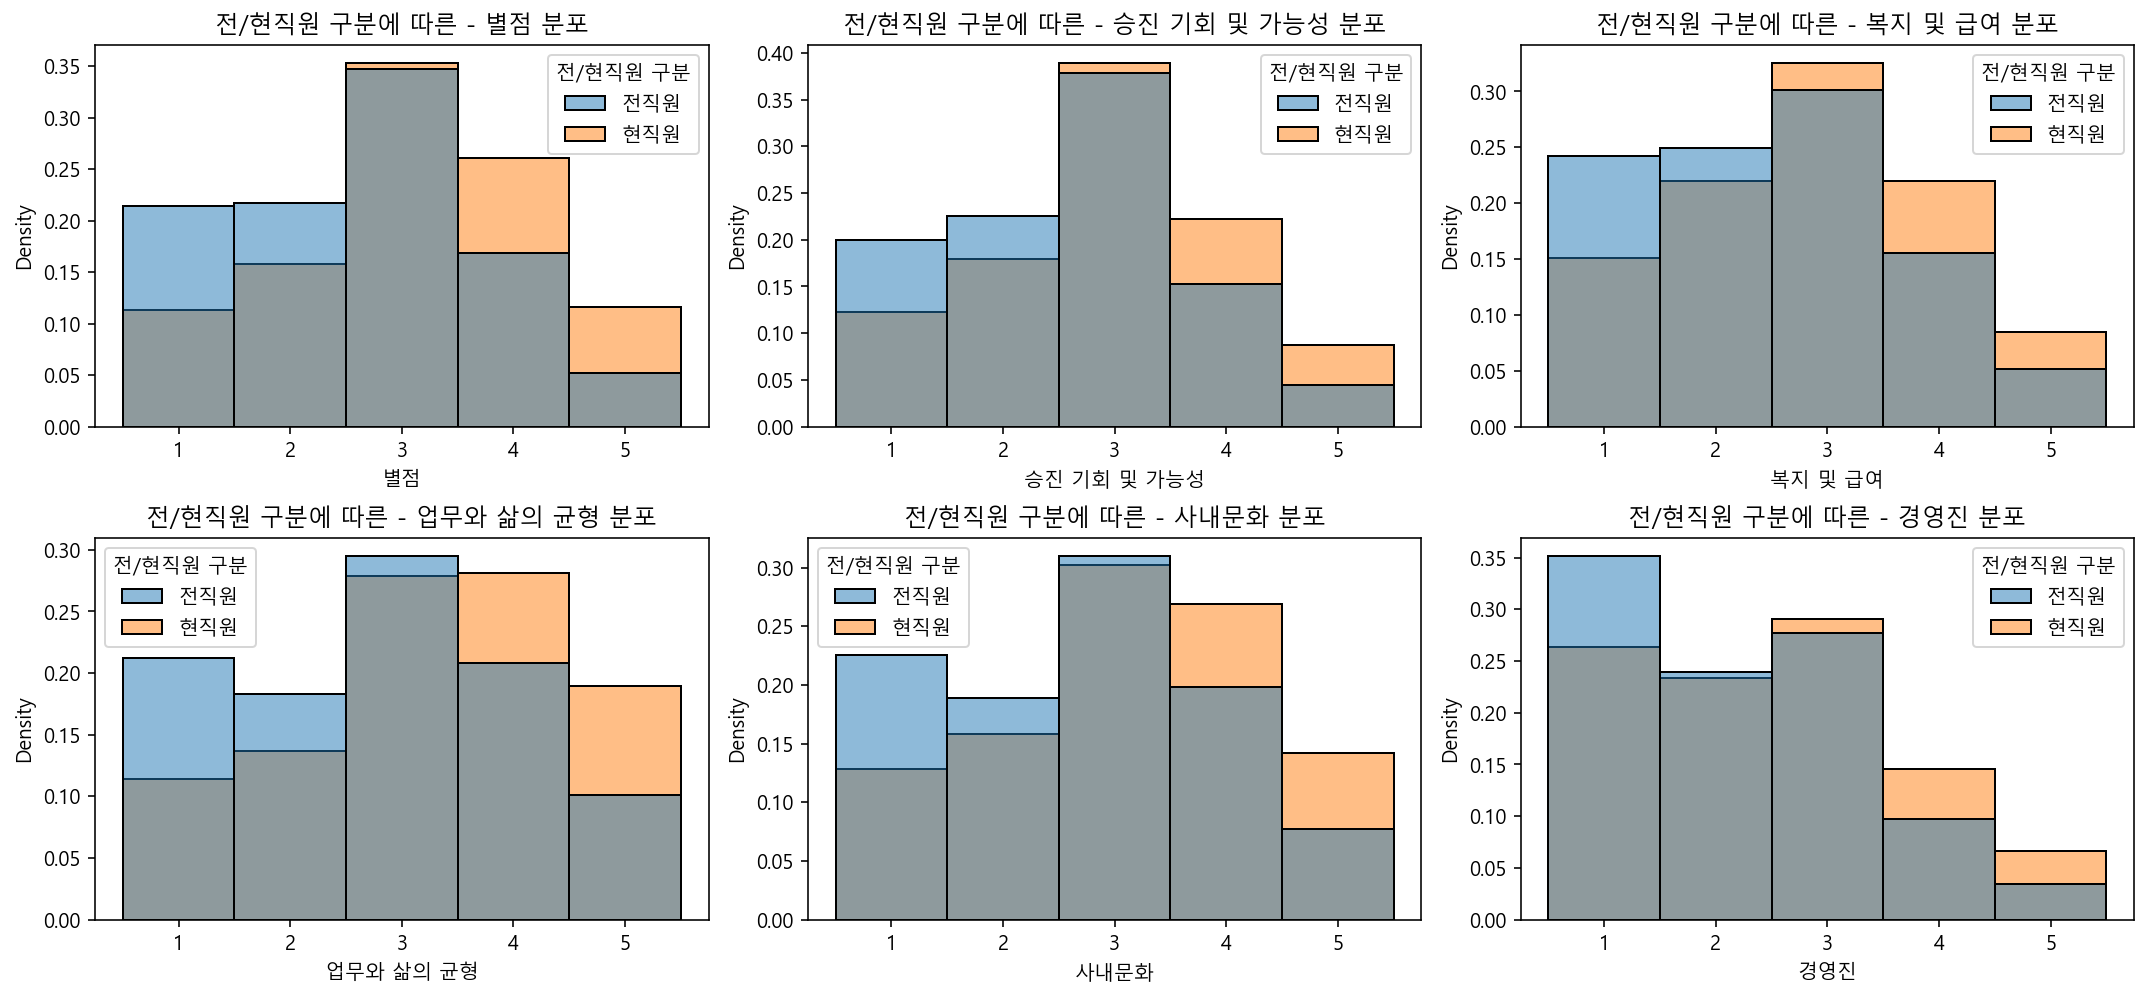

In [71]:
histplot('Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ')

- point plot
    - Î™®Îì† Ï†êÏàòÏóêÏÑú Ï†ÑÏßÅÏõêÏùò ÌèâÍ∑†ÌèâÏ†êÏù¥ ÏÉÅÎåÄÏ†Å(ÌòÑÏßÅÏõêÎåÄÎπÑ)ÏúºÎ°ú ÎÇÆÎã§.
    - ÌÜµÍ≥ÑÍ≤ÄÏ†ïÍπåÏßÄÎäî ÌïÑÏöî ÏóÜÏùÑ ÎìØ

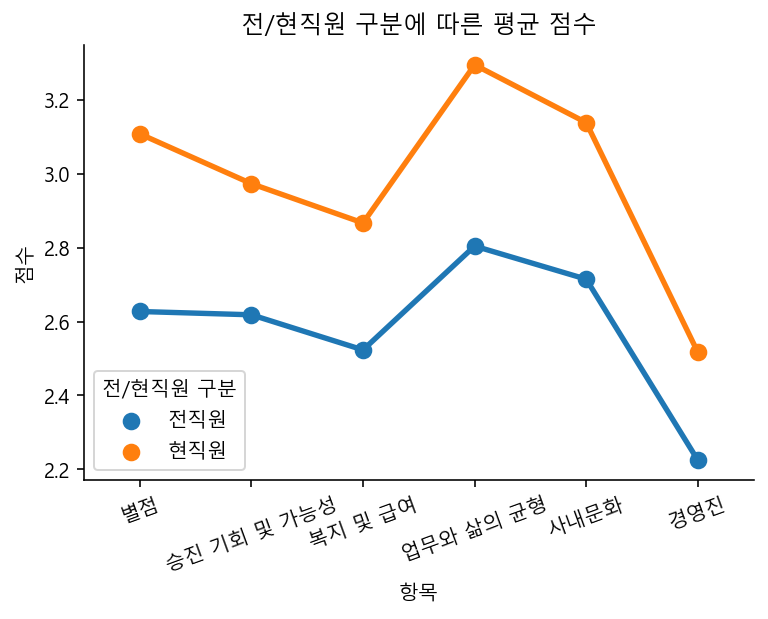

In [85]:
pointplot('Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ')

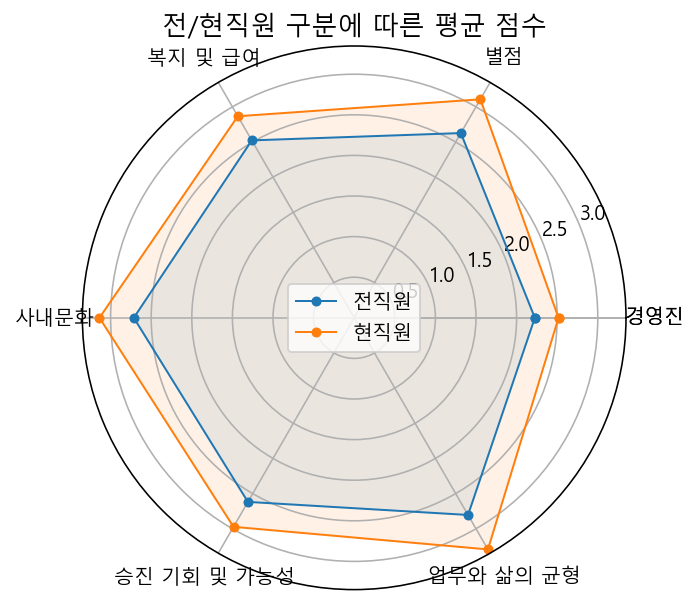

In [73]:
radarplot('Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ')

In [74]:
mwutest('Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ', 'Ï†ÑÏßÅÏõê', 'less')

Î≥ÑÏ†ê
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=1984382730.0, pvalue=0.0)
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2122546085.5, pvalue=0.0)
Î≥µÏßÄ Î∞è Í∏âÏó¨
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2152273694.0, pvalue=0.0)
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2017721013.5, pvalue=0.0)
ÏÇ¨ÎÇ¥Î¨∏Ìôî
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2083372770.5, pvalue=0.0)
Í≤ΩÏòÅÏßÑ
H1 Ï±ÑÌÉù - Ï†ÑÏßÅÏõê Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=2227281169.5, pvalue=0.0)


- Ï†ÑÌòÑÏßÅÏóê Îî∞Î•∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### `Í∑ºÎ¨¥ÏßÄÏó≠`

- ÏàòÎèÑÍ∂å Í∑ºÎ¨¥ Ïó¨Î∂Ä
    - Í∞ÄÏÑ§ : ÏàòÎèÑÍ∂å Í∑ºÎ¨¥ÏûêÏùò ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§. 

In [78]:
# ÏàòÎèÑÍ∂å Ïó¨Î∂Ä Ïª¨Îüº ÏÉùÏÑ±
cond = df['Í∑ºÎ¨¥ÏßÄÏó≠'].isin(['ÏÑúÏö∏','Í≤ΩÍ∏∞','Ïù∏Ï≤ú'])
df['ÏàòÎèÑÍ∂åÏó¨Î∂Ä'] = np.where(cond,'ÏàòÎèÑÍ∂å','ÎπÑÏàòÎèÑÍ∂å')
df.head(1)

ÌöåÏÇ¨Î™Ö        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠  ÏûëÏÑ±ÎÖÑÎèÑ  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  \
index                                                                          
0      Ìã∞Î™¨  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2022   3            5        5          5   

       ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ                         Ï¥ùÌèâ                                Ïû•Ï†ê  \
index                                                                           
0         5    5  Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïûò Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò ÌöåÏÇ¨  ÏÇ¨ÎÇ¥ Ïπ¥Ìéò,ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ Îì± ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®   

                                                     Îã®Ï†ê  \
index                                                     
0      ÎÇòÎ¶Ñ Í±¥Í∞ï ÏÉùÍ∞ÅÌïòÎäî Ìù°Ïó∞ÏûêÏòÄÏñ¥ÏÑú ÎãπÏãú Ìù°Ïó∞ÌïòÎü¨ ÌïòÎ£®Ïóê 3Î≤àÎßå ÎÇòÍ∞îÎäîÎç∞ ÏúÑÏóêÏÑú ÏßÄÏ†Å Î∞õÏùå   

                   Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä  Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò ITÏó¨Î∂Ä ÏàòÎèÑÍ∂åÏó¨Î∂Ä  
index                                                                  
0      Ï¢ãÏùÄ ÏÇ¨ÎÇ¥Î¨∏ÌôîÍ∞Ä ÎßåÎì§Ïñ¥ÏßÄÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏùå         ÏÑ±Ïû•      Ï∂îÏ≤ú         0  ÎπÑIT   ÏàòÎèÑÍ∂å

In [79]:
countplot('ÏàòÎèÑÍ∂åÏó¨Î∂Ä')

In [80]:
histplot('ÏàòÎèÑÍ∂åÏó¨Î∂Ä')

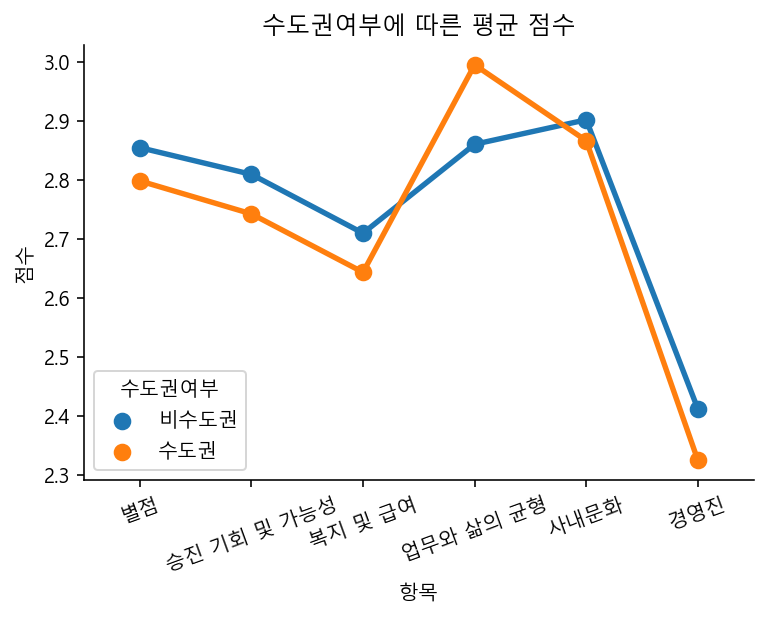

In [86]:
pointplot('ÏàòÎèÑÍ∂åÏó¨Î∂Ä')

In [87]:
radarplot('ÏàòÎèÑÍ∂åÏó¨Î∂Ä')

In [88]:
mwutest('ÏàòÎèÑÍ∂åÏó¨Î∂Ä','ÏàòÎèÑÍ∂å')

Î≥ÑÏ†ê
H0 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=848973587.0, pvalue=0.9999993501823736)
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±
H0 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=844452645.0, pvalue=0.9999999979649861)
Î≥µÏßÄ Î∞è Í∏âÏó¨
H0 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=844483565.0, pvalue=0.9999999970678314)
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï
H1 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÌÅ¨Îã§.
MannwhitneyuResult(statistic=923573622.0, pvalue=9.763713197405202e-32)
ÏÇ¨ÎÇ¥Î¨∏Ìôî
H0 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=857710428.0, pvalue=0.998010998561801)
Í≤ΩÏòÅÏßÑ
H0 Ï±ÑÌÉù - ÏàòÎèÑÍ∂å Í∑∏Î£πÏùò ÌèâÏ†êÏù¥ Îçî ÏûëÎã§.
MannwhitneyuResult(statistic=835178198.0, pvalue=0.9999999999999989)


- Î≥∏ÏÇ¨ Í∑ºÎ¨¥Ïó¨Î∂Ä

In [75]:
df_company_list

ÌöåÏÇ¨Î™Ö Î≥∏ÏÇ¨ÏúÑÏπò   Î¶¨Î∑∞Ïàò  ÌèâÍ∑†Î≥ÑÏ†ê  ÌèâÍ∑†Ïó∞Î¥â
index                                    
0            (Ï£º)Ìã∞Î™¨   ÏÑúÏö∏  2022   2.8  4426
1           (Ï£º)ÏúÑÎ©îÌîÑ   ÏÑúÏö∏  2003   2.6  2874
2       ÏÇºÏÑ±ÏóêÏä§ÎîîÏóêÏä§(Ï£º)   ÏÑúÏö∏  1801   3.5  8296
3        (Ï£º)ÏóòÏßÄÏî®ÏóîÏóêÏä§   ÏÑúÏö∏  1759   3.1  6293
4        (Ï£º)ÏóòÏßÄÏú†ÌîåÎü¨Ïä§   ÏÑúÏö∏  1747   3.2  6375
...            ...  ...   ...   ...   ...
1196   Ï†úÏù¥ÏóîÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄ(Ï£º)   ÏÑúÏö∏    30   2.4  3808
1197       ÏßÄÎãàÌÇ§Ï¶à(Ï£º)   ÏÑúÏö∏    30   2.7  3212
1198        ÏΩ§ÏúÑÏ¶à(Ï£º)   ÏÑúÏö∏    30   2.4  2794
1199       Ìä∏ÎüºÌîºÏïÑ(Ï£º)   ÏÑúÏö∏    30   2.0  4144
1200   ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ(Ï£º)   ÏÑúÏö∏    30   2.3  3058

[1201 rows x 5 columns]

### `ÏûëÏÑ±Ïõî` -> `ÏûëÏÑ±ÎÖÑÎèÑ`

In [167]:
# Í≤∞Ï∏°ÏπòÍ∞Ä Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
cond = df['ÏûëÏÑ±ÎÖÑÎèÑ'] == 'unknown'
tmp = df[~cond]

In [168]:
# Ïó∞ÎèÑÎ≥Ñ ÌÖåÏù¥Î∏î ÏÉùÏÑ± 
grouped = df[['ÏûëÏÑ±ÎÖÑÎèÑ'] + arr_scores].groupby('ÏûëÏÑ±ÎÖÑÎèÑ').mean()
grouped = grouped.drop('unknown', axis=0)
grouped.T.style.background_gradient(cmap='summer_r')

- 2017ÎÖÑÎèÑÏóê Î¨¥Ïä®ÏùºÏù¥? 
    - 2017ÎÖÑÏóê Î™®Îì†Ìï≠Î™© ÌèâÏ†ê ÏµúÏ†ÄÏπò 
- ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï -> 2018ÎÖÑÎ∂ÄÌÑ∞ Îß§Ïö∞ ÎÜíÏïÑÏßê
- Í≤ΩÏòÅÏßÑÏóê ÎåÄÌïú Î∂àÎßåÏù¥ Í∞ÄÏû• Ïã¨ÌïúÍ∞Ä?
    - Í≤ΩÏòÅÏßÑ Ï†êÏàòÍ∞Ä Îã§Î•∏ Ï†êÏàòÎì§Ïóê ÎπÑÌï¥ Ïú†ÎÇúÌûà ÎÇÆÎã§. 

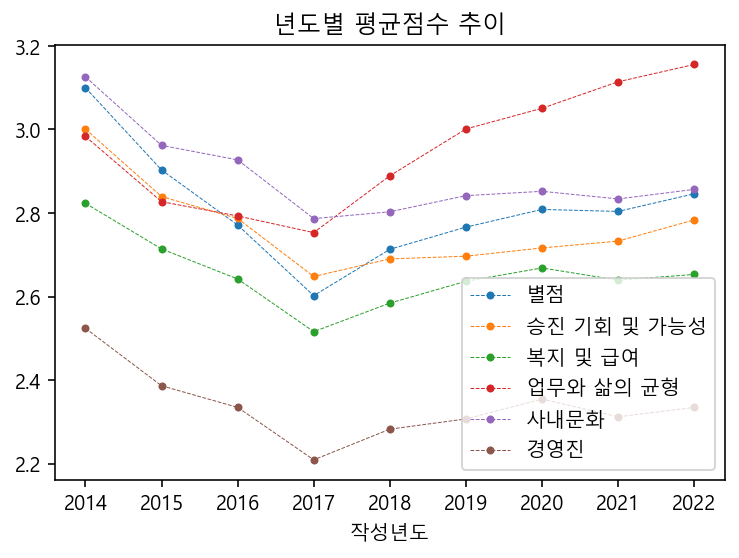

In [169]:
grouped.plot(marker='o', ms=3 ,lw=0.5, ls='--')
plt.title('ÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑†Ï†êÏàò Ï∂îÏù¥')
plt.show()

- IT vs ÎπÑ ITÎèÑ Í∞ôÏùÄ Í≤ΩÌñ•Ïù∏ÏßÄ ÌôïÏù∏

In [173]:
cond = tmp['ITÏó¨Î∂Ä'] == 'IT'
tmp_it = tmp[cond]
tmp_nit = tmp[~cond]

In [174]:
# it
grouped = tmp_it[['ÏûëÏÑ±ÎÖÑÎèÑ'] + ['Î≥ÑÏ†ê','ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±','Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî','Í≤ΩÏòÅÏßÑ']].groupby('ÏûëÏÑ±ÎÖÑÎèÑ').mean()
grouped.T

ÏûëÏÑ±ÎÖÑÎèÑ             2014      2015      2016      2017      2018      2019  \
Î≥ÑÏ†ê           3.096429  2.883888  2.773794  2.583006  2.723499  2.777906   
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  3.003628  2.833150  2.792055  2.641484  2.717497  2.737000   
Î≥µÏßÄ Î∞è Í∏âÏó¨      2.812297  2.709843  2.638363  2.496664  2.582503  2.619829   
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï    2.993508  2.813270  2.797254  2.757064  2.917497  3.022803   
ÏÇ¨ÎÇ¥Î¨∏Ìôî         3.118388  2.920234  2.905892  2.760793  2.805697  2.827671   
Í≤ΩÏòÅÏßÑ          2.477373  2.330162  2.288590  2.151688  2.263276  2.283491   

ÏûëÏÑ±ÎÖÑÎèÑ             2020      2021      2022  
Î≥ÑÏ†ê           2.811287  2.804672  2.808117  
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  2.751120  2.760258  2.801175  
Î≥µÏßÄ Î∞è Í∏âÏó¨      2.651388  2.619603  2.618726  
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï    3.067035  3.139151  3.185831  
ÏÇ¨ÎÇ¥Î¨∏Ìôî         2.837787  2.821160  2.813635  
Í≤ΩÏòÅÏßÑ          2.325246  2.280827  2.265753

In [175]:
# ÎπÑ it
grouped = tmp_nit[['ÏûëÏÑ±ÎÖÑÎèÑ'] + ['Î≥ÑÏ†ê','ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±','Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî','Í≤ΩÏòÅÏßÑ']].groupby('ÏûëÏÑ±ÎÖÑÎèÑ').mean()
grouped.T

ÏûëÏÑ±ÎÖÑÎèÑ             2014      2015      2016      2017      2018      2019  \
Î≥ÑÏ†ê           3.105544  2.934176  2.767031  2.628081  2.698229  2.750258   
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  2.995658  2.849087  2.778947  2.656752  2.651528  2.642164   
Î≥µÏßÄ Î∞è Í∏âÏó¨      2.841683  2.720650  2.647269  2.542069  2.586547  2.658786   
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï    2.965264  2.849488  2.786296  2.747320  2.848900  2.971815   
ÏÇ¨ÎÇ¥Î¨∏Ìôî         3.138945  3.030102  2.958491  2.821543  2.798772  2.859901   
Í≤ΩÏòÅÏßÑ          2.604876  2.478828  2.402979  2.287245  2.309197  2.338323   

ÏûëÏÑ±ÎÖÑÎèÑ             2020      2021      2022  
Î≥ÑÏ†ê           2.804782  2.802347  2.893072  
ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  2.672346  2.694976  2.760971  
Î≥µÏßÄ Î∞è Í∏âÏó¨      2.689759  2.665860  2.695478  
ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï    3.029932  3.079721  3.117398  
ÏÇ¨ÎÇ¥Î¨∏Ìôî         2.869541  2.850532  2.910002  
Í≤ΩÏòÅÏßÑ          2.391190  2.354822  2.420361

- Ï†ÑÎ∞òÏ†ÅÏù∏ Ï∂îÏ†úÎäî ÎπÑÏä∑ÌïúÎç∞
    - ÎπÑ ITÏßÅÍµ∞Ïùò Í≤ΩÏö∞ 2017ÎÖÑÏóê ÏµúÏ†ÄÏπò Ïù¥ÌõÑ Î™®Îì†Ìï≠Î™©Ïùò ÌèâÏ†êÏù¥ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Íæ∏Ï§ÄÌïòÍ≤å ÏÉÅÏäπÌïòÍ≥† ÏûàÎäî Î∞òÎ©¥, 
    - ITÏßÅÍµ∞Ïùò Í≤ΩÏö∞ ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï(ÏõåÎùºÎ∞∏) Ïô∏ÏóêÎäî Îã§Ïãú ÌïòÎùΩÏÑ∏Î•º Î≥¥Ïù∏Îã§. 

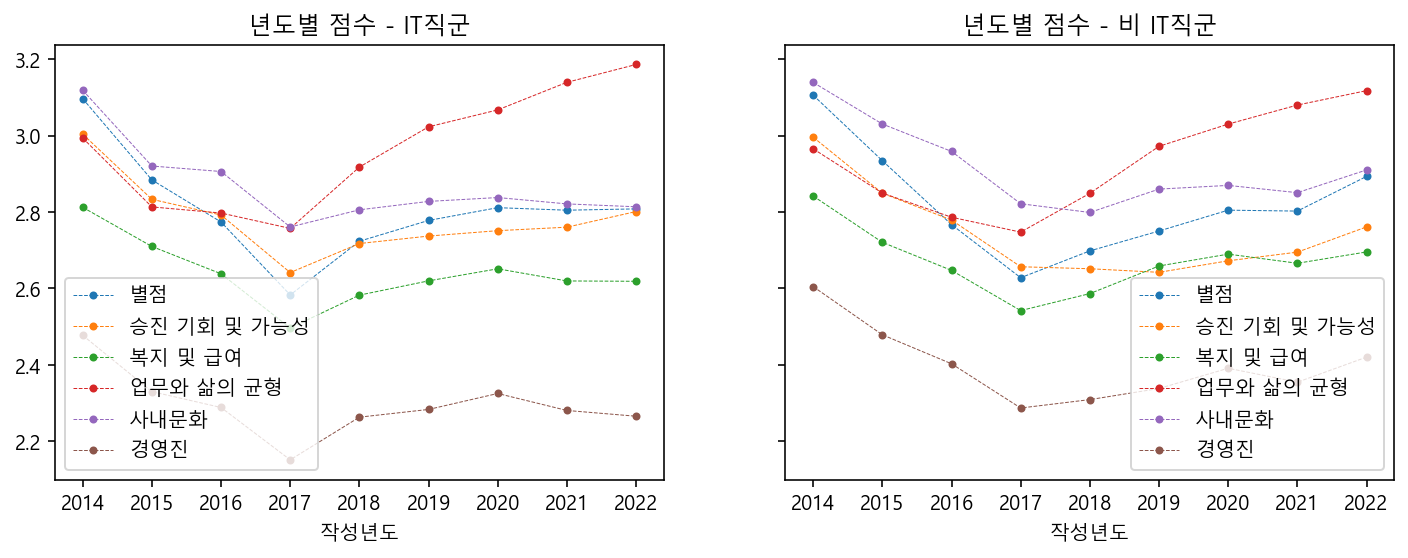

In [176]:
#ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)

#it
grouped = tmp_it[['ÏûëÏÑ±ÎÖÑÎèÑ'] + ['Î≥ÑÏ†ê','ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±','Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî','Í≤ΩÏòÅÏßÑ']].groupby('ÏûëÏÑ±ÎÖÑÎèÑ').mean()
grouped.plot(marker='o', ms=3 ,lw=0.5, ls='--', ax=ax[0])
ax[0].set_title('ÎÖÑÎèÑÎ≥Ñ Ï†êÏàò - ITÏßÅÍµ∞')

#non-it
grouped = tmp_nit[['ÏûëÏÑ±ÎÖÑÎèÑ'] + ['Î≥ÑÏ†ê','ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±','Î≥µÏßÄ Î∞è Í∏âÏó¨', 'ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï', 'ÏÇ¨ÎÇ¥Î¨∏Ìôî','Í≤ΩÏòÅÏßÑ']].groupby('ÏûëÏÑ±ÎÖÑÎèÑ').mean()
grouped.plot(marker='o', ms=3 ,lw=0.5, ls='--', ax=ax[1])
ax[1].set_title('ÎÖÑÎèÑÎ≥Ñ Ï†êÏàò - ÎπÑ ITÏßÅÍµ∞')

plt.show()

### `1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù`
- ÏÑ±Ïû• / ÎπÑÏä∑ 2Í∞ÄÏßÄ Ìï≠Î™©Îßå ÏûàÎã§.
- Ï†ÑÏ≤¥Ïùò ÏïΩ 30%ÎßåÏù¥ 1ÎÖÑÎí§Ïóê Í∏∞ÏóÖÏù¥ ÏÑ±Ïû•Ìï† Í≤ÉÏù¥ÎùºÍ≥† ÏûëÏÑ±   

In [188]:
cond = df['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù'] == 'un'
tmp = df[~cond]
tmp['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù'].unique()

array(['ÏÑ±Ïû•', 'ÎπÑÏä∑', 'unknown'], dtype=object)

In [189]:
grouped = tmp[['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù'] + arr_scores].groupby('1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù').mean()
grouped

Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±   Î≥µÏßÄ Î∞è Í∏âÏó¨  ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï      ÏÇ¨ÎÇ¥Î¨∏Ìôî       Í≤ΩÏòÅÏßÑ
1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù                                                                
unknown     1.894934     2.045233  1.941915   2.438112  2.105202  1.471014
ÎπÑÏä∑          2.889293     2.789951  2.690338   3.038368  2.937294  2.380987
ÏÑ±Ïû•          3.893609     3.651500  3.559498   3.631797  3.799080  3.443483

- 1ÎÖÑ ÌõÑ Í∏∞ÏóÖÏù¥ ÏÑ±Ïû• Ìï† Í≤ÉÏù¥Îã§ ÎùºÍ≥† ÏòàÏÉÅÌïú Í≤ΩÏö∞Ïùò ÎßåÏ°±ÎèÑÍ∞Ä Í∑∏Î†áÏßÄ ÏïäÏùÄ Í∑∏Î£πÏóê ÎπÑÌï¥ ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÎã§. 

In [190]:
countplot('1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù')

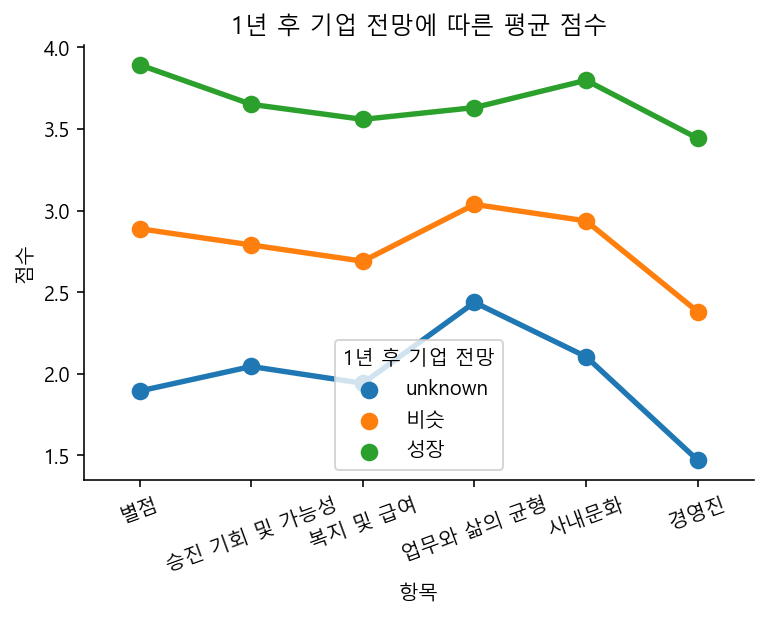

In [191]:
pointplot('1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù')

In [192]:
radarplot('1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù')

###  Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä
- 1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßùÍ≥º Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂ÄÎäî Îß§Ïö∞ ÎπÑÏä∑Ìïú Ìï≠Î™©Ïù∏ Í≤É Í∞ôÏùÄÎç∞?
    - Í∏∞ÏóÖÏùÑ Ï∂îÏ≤úÌïú Í≤ΩÏö∞Í∞Ä Ï†ÑÏ≤¥Ïùò 49.2%Î°ú, 1ÎÖÑ ÌõÑ Í∏∞ÏóÖÏù¥ ÏÑ±Ïû•Ìï† Í≤ÉÏù¥Îã§ÎùºÍ≥† ÏùëÎãµÌïú Í≤ΩÏö∞Î≥¥Îã§ ÎÜíÏùÄ ÎπÑÏú®ÏùÑ Î≥¥Ïù∏Îã§.
    - 1ÎÖÑ Îí§ÏóêÎèÑ Í∏∞ÏóÖÏù¥ ÎπÑÏä∑Ìï† Í≤É Í∞ôÏùÄÎç∞ Ï∂îÏ≤úÌïú Í≤ΩÏö∞Í∞Ä ÏÉÅÎãπ Ïàò ÏûàÎã§. 
        -> Ïñ¥Îñ§ Í≤ΩÏö∞?

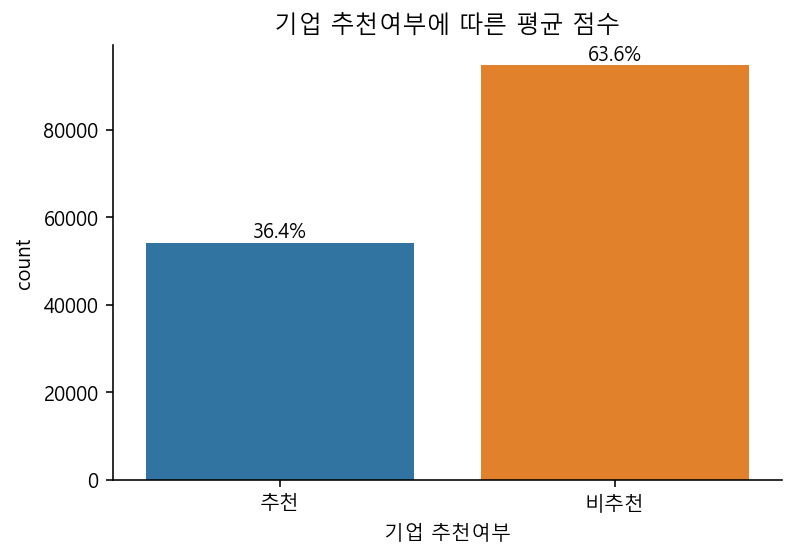

In [193]:
countplot('Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')

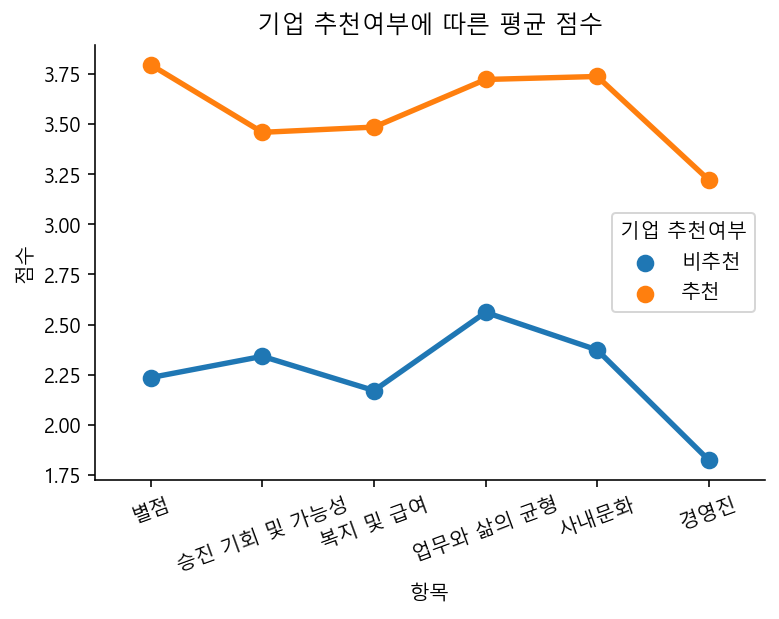

In [194]:
pointplot('Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')

In [195]:
radarplot('Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')

- Í∏∞ÏóÖ ÎπÑÏ∂îÏ≤úÌïú Í≤ΩÏö∞ 
    - 1ÎÖÑ ÌõÑ Í∏∞ÏóÖÏ†ÑÎßùÏùÑ Í∏çÏ†ïÏ†ÅÏúºÎ°ú Î≥¥Îäî Í≤ΩÏö∞Îäî Îß§Ïö∞ Ï†ÅÎã§(ÏïΩ 10%). 
- Í∏∞ÏóÖÏùÑ Ï∂îÏ≤úÌïú Í≤ΩÏö∞ 
    - ÏÑ±Ïû•Ìï† Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤ΩÏö∞ÏôÄ, Î∞òÎåÄÏùò Í≤ΩÏö∞Í∞Ä Í±∞Ïùò 50:50ÏúºÎ°ú ÎπÑÏä∑ÌïòÎã§.
    - Í∏∞ÏóÖÏùò Ï†ÑÎßùÍ≥º Í∏∞ÏóÖÏùò Ï∂îÏ≤úÏó¨Î∂ÄÎäî ÌÅ¨Í≤å ÏÉÅÍ¥ÄÏù¥ ÏóÜÎã® ÎßêÏù∏Í∞Ä?
    - **Í∞ÅÍ∞ÅÏùò ÏºÄÏù¥Ïä§(4Í∞ÄÏßÄ)Ïóê Îî∞Îùº ÌÖçÏä§Ìä∏ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÏõêÏù¥Ïóê ÎåÄÌï¥ ÌååÏïÖÌï¥Î≥¥Ïûê**

In [196]:
grouped = tmp[['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù', 'Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä']].value_counts(['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù','Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä'])
grouped_ct = pd.crosstab(tmp['1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù'], tmp['Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä'], normalize=True)
sns.heatmap(grouped_ct, annot=True, cmap='Blues');

### Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò

In [197]:
df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'].describe()

count    148813.000000
mean          1.652456
std           4.171619
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         624.000000
Name: Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò, dtype: float64

In [198]:
x='Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'
sns.boxplot(x=x, data=df, y='Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä');

- Ï∂îÏ≤ú Í∏∞Îä•ÏùÑ ÎßéÏù¥ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäîÏßÄ Ï∂îÏ≤úÏàò 6Í∞úÎ∂ÄÌÑ∞ Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã®
- Ïù¥ÌõÑ outlier Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌÖçÏä§Ìä∏ Ï∂îÍ∞ÄÎ∂ÑÏÑù ÌïÑÏöî 

In [199]:
Q1 = df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'].quantile(0.25)
Q3 = df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'].quantile(0.75)
IQR = Q3 - Q1

range1 = (Q1 - 1.5 *IQR)
range2 = (Q3 + 1.5 *IQR)

range1, range2

(-3.0, 5.0)

In [200]:
cond1 = df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'] < range1
cond2 = df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'] > range2

outlier = df[cond1 | cond2]
outlier

ÌöåÏÇ¨Î™Ö        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠  ÏûëÏÑ±ÎÖÑÎèÑ  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  \
index                                                                      
506           Ìã∞Î™¨    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2021   2            2        2   
617           Ìã∞Î™¨     ÏòÅÏóÖ/Ï†úÌú¥      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2020   1            1        1   
655           Ìã∞Î™¨    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2020   1            1        1   
711           Ìã∞Î™¨  ÏÑúÎπÑÏä§/Í≥†Í∞ùÏßÄÏõê      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2020   1            1        1   
748           Ìã∞Î™¨       ÎîîÏûêÏù∏      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2020   1            1        1   
...          ...       ...      ...  ...   ...  ..          ...      ...   
148783      Ìä∏ÎüºÌîºÏïÑ    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2017   1            1        2   
148784      Ìä∏ÎüºÌîºÏïÑ    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2017   2            2        3   
148787      Ìä∏ÎüºÌîºÏïÑ    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2017   2            3        1   
148790      Ìä∏ÎüºÌîºÏïÑ    IT/Ïù∏ÌÑ∞ÎÑ∑      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2016   2            4        2   
148808  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ       ÎîîÏûêÏù∏      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2018   1            1        1   

        ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ  \
index                          
506             4     4    1   
617             1     1    1   
655             2     2    1   
711             1     1    1   
748             2     2    1   
...           ...   ...  ...   
148783          3     1    1   
148784          3     1    1   
148787          1     1    2   
148790          2     1    3   
148808          1     1    1   

                                                       Ï¥ùÌèâ  \
index                                                       
506     ÎåÄÌëú Î∞îÎÄåÍ≥† ÎßõÌÉ±Ïù¥Í∞êÍ∑∏Ï†ÑÍπåÏßÄÎäî Í∏∞ÏóÖÎ¨∏Ìôî Îã§Îì§ ÏõÉÏúºÎ©∞ Ïó¥Ïã¨Ìûà ÏúºÏå∞ÏúºÏå∞ÌïòÎäîÏñ¥ÎîúÍ∞ÄÎèÑ Ìã∞Î™¨...   
617     Î¶¨Î∑∞ Í≥µÌÜµÎêòÎäî Î∂ÄÎ∂Ñ ÏûàÏ£† Í∞ôÏù¥ ÏùºÌïòÎäî ÎèôÎ£åÎì§Îßå Ï¢ãÍµ¨Ïöî ÎÇòÎ®∏ÏßÄÎäî Î≠ê Ïù¥Îî¥ ÎÇ¥Í∞Ä Ïôú Ïù¥...   
655     2019ÎÖÑ ÌòÑ ÎåÄÌëú Ïò§Í∏∞Ï†ÑÍπåÏßÑ Î∂ÑÏúÑÍ∏∞ Ï¢ãÏïòÏùå ÌòÑÎåÄÌëú Ïù¥xxÏò® Ïù¥ÌõÑÎ°ú Ï§Ñ Ìá¥ÏÇ¨ Î∂ÑÏúÑÍ∏∞ ÏóâÎßù   
711               Î≥Ñ ÌïòÎÇò Ï°∞Ï∞®ÎèÑ ÏïÑÍπùÎã§ Ïó¨Í∏∞ÏÑú ÏùºÌïòÎ©¥ÏÑú ÏûêÏÇ¥ ÏÉùÍ∞ÅÏùÑ Ìïú ÎÇ†Ïù¥ Îã® ÌïòÎ£®ÎèÑ   
748            Ìã∞Î™¨ÏùÄ ÌòÑ ÎåÄÌëúÍ∞Ä ÏûàÍ∏∞ Ï†ÑÍ≥º ÌõÑÎ°ú ÎÇòÎâòÏñ¥ÏßëÎãàÎã§ ÏÇ¨ÎûåÎì§Í≥º Î¨∏ÌôîÎäî Ï†ïÎßê Ï¢ãÏïÑÏöî    
...                                                   ...   
148783              Î≥Ñ5 Í∞úÏßúÎ¶¨ Í∏∞ÏóÖÌèâÏùÑ Ï†úÏô∏ÌïòÍ≥† Ïù¥Ï†Ñ Î¶¨Î∑∞Î•º Î≥¥Î©¥ Ïù¥ ÌöåÏÇ¨Î•º Ïù¥Ìï¥Ìï†Ïàò   
148784                     ÎØ∏Íµ≠ÏóêÏÑú ÏÑúÎπÑÏä§ÌïòÎäî 20ÏÑ∏Í∏∞ ÎåÄÌëú ÌïúÍµ≠ IT Ï§ëÏÜåÍ∏∞ÏóÖ    
148787                      Ïô∏Íµ≠Í≥Ñ Í∏∞ÏóÖÏóê ÌôòÏÉÅÏù¥ Î¨¥ÏÉâÌïòÎ¶¨ÎßåÏπò ÌïúÍµ≠Ï†ÅÏù¥Í≥† Íº∞ÎåÄÏ†ÅÏù∏   
148790           Ïô∏Íµ≠Í≥ÑÍ∏∞ÏóÖÏúºÎ°ú ÎêòÏñ¥ÏûàÏñ¥ ÎåÄÏö∞Î•º Ïô∏Íµ≠Í≥ÑÏ≤òÎüºÌïòÏßÄÎßå Ïñ¥Ï©îÏàòÏóÜÎäî Ïß≠Íµ≠Í≥ÑÍ∏∞ÏóÖÏùºÎøê    
148808       ÎÇ°ÏùÄ ÏÇ¨Í≥†Î∞©ÏãùÍ≥º ÏÇ¨Í∏∞ÍæºÎì§Ïù¥ Î™®Ïó¨ÏûàÎäîÍ≥≥ ÎèàÏóÜÏñ¥ÎèÑ Í∞ÄÏßÄÎßêÏïÑÏïºÌï†Í≥≥ Î≥ÑÌïòÎÇòÏ£ºÍ∏∞ÎèÑ ÏïÑÍπåÏõÄ   

                                                       Ïû•Ï†ê  \
index                                                       
506     itÏ™ΩÏùÄ ÏπºÌá¥ ÏòÅÏóÖÎ∂ÄÏÑúÎßåÌÅº Í∞ïÏ†úÏïºÍ∑ºÍ∞ïÏöîÎÇò Ïã§Ï†ÅÍ∞ïÏöî Îì±ÏùÄ ÏóÜÏñ¥ÏÑú Î≤ÑÌÖ®Î≥ºÎßåÌï® ÏÇ¨ÎûåÎì§Ïù¥ ...   
617     1 ÏßÑÏßú Ïò§Îäò Ìï¥ÏïºÌï† ÎØ∏ÏÖò ÏôÑÏàòÌïòÎ©¥ ÏπºÌá¥ 2 Í∞ôÏù¥ ÏùºÌïòÎäî ÎèôÎ£åÎì§Ïù¥ Ï†äÍ≥† ÏùºÏù¥ ÌûòÎì§Ïñ¥...   
655             Í∏∞ÏóÖÏùò Ïû•Ï†êÏù¥ ÏóÜÏñ¥Ï†∏ÏÑú Ïì∏ÎßêÏù¥ Î≥ÑÎ°ú ÏóÜÏäµÎãàÎã§ Í∞ôÏù¥ ÏùºÌïòÎäî ÏÇ¨ÎûåÎì§ÏùÄ Ï¢ãÏäµÎãàÎã§   
711     ÎààÏùÑ ÏîªÍ≥† Ï∞æÏïÑ Î¥êÎèÑ ÏóÜÎã§ ÏÇ¨Îûå Ï∑®Í∏âÏùÑ Ï†ÑÌòÄ Î™ª Î∞õÏïÑÏÑú ÎÜÄÎûçÍ≥† ÍµâÏû•ÌïòÎã§Í≥† ÎäêÎÇÄÎã§ÎäîÍ±∞...   
748     ÏúóÏÇ¨Îûå ÎààÏπò ÏïàÎ≥¥Í≥† Ïó∞Ï∞®ÏÇ¨Ïö© Í∞ÄÎä•ÏÇ¨ÎûåÎì§Ïù¥ Ï¢ãÏùåÎ¨∏ÌôîÍ∞Ä Ï¢ãÏùåÏù¥Ï†ÑÍπåÏßÄÎäî Îä•Î†•ÏûàÎäî ÏÇ¨ÎûåÎì§Ïù¥...   
...                                                   ...   
148783                    Îã§ÏñëÌïú Î≥µ

In [201]:
norm = df[~(cond1 | cond2)]
norm

ÌöåÏÇ¨Î™Ö        ÏßÅÍµ∞ Ï†Ñ/ÌòÑÏßÅÏõê Íµ¨Î∂Ñ Í∑ºÎ¨¥ÏßÄÏó≠  ÏûëÏÑ±ÎÖÑÎèÑ  Î≥ÑÏ†ê  ÏäπÏßÑ Í∏∞Ìöå Î∞è Í∞ÄÎä•ÏÑ±  Î≥µÏßÄ Î∞è Í∏âÏó¨  \
index                                                                      
0             Ìã∞Î™¨  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2022   3            5        5   
1             Ìã∞Î™¨     ÏòÅÏóÖ/Ï†úÌú¥      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2022   3            5        5   
2             Ìã∞Î™¨       ÎîîÏûêÏù∏      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2022   2            1        1   
3             Ìã∞Î™¨     ÏòÅÏóÖ/Ï†úÌú¥      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2022   3            4        3   
4             Ìã∞Î™¨    IT/Ïù∏ÌÑ∞ÎÑ∑      Ï†ÑÏßÅÏõê   Í∏∞ÌÉÄ  2022   3            3        3   
...          ...       ...      ...  ...   ...  ..          ...      ...   
148816  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2015   1            2        2   
148817  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  ÏÑúÎπÑÏä§/Í≥†Í∞ùÏßÄÏõê      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2015   2            3        2   
148818  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ  ÎßàÏºÄÌåÖ/ÏãúÏû•Ï°∞ÏÇ¨      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2015   2            2        2   
148819  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ        Í∏∞ÌÉÄ      ÌòÑÏßÅÏõê   ÏÑúÏö∏  2015   2            3        2   
148820  ÌïúÍµ≠ÏòêÎ°úÏö∞ÌéòÏù¥ÏßÄ        Í∏∞ÌÉÄ      Ï†ÑÏßÅÏõê   ÏÑúÏö∏  2014   2            2        3   

        ÏóÖÎ¨¥ÏôÄ ÏÇ∂Ïùò Í∑†Ìòï  ÏÇ¨ÎÇ¥Î¨∏Ìôî  Í≤ΩÏòÅÏßÑ  \
index                          
0               5     5    5   
1               5     1    1   
2               2     1    1   
3               4     4    3   
4               3     3    3   
...           ...   ...  ...   
148816          2     3    2   
148817          3     5    1   
148818          2     2    2   
148819          2     1    2   
148820          2     2    2   

                                                       Ï¥ùÌèâ  \
index                                                       
0                                    Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò   
1       ÏòÅÏóÖÎ∂ÄÏÑúÎäî Í∑∏ÎÇòÎßà Ïö¥ÏòÅÏù¥ ÏûòÎêòÎÇò Î≥Ñ ÏùòÎØ∏ÏóÜÎäî ÏΩòÌÖêÏ∏† Ï†úÏûëÍ¥ÄÎ†®Ìïú Î¶¨ÏÜåÏä§Í∞Ä Îì§Ïñ¥Í∞ê Î∞©Ìñ•...   
2                   ÌïòÎ£®Í∞Ä Îã§Î•¥Í≤å Î∞îÎÄåÎäî Ï°∞ÏßÅÏù¥Ï†ÑÏùò Ï¢ãÏïòÎçò Í∏∞ÏñµÎßàÏ†Ä Ìá¥ÏÉâÎêòÍ≤åÌïòÎäî Í≤ΩÏòÅÏßÑ   
3                       Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÎßåÏ°±Ïä§ÎüΩÏäµÎãàÎã§ ÏΩîÎ°úÎÇò Í∏∞Í∞ÑÎèôÏïà Ïû¨ÌÉùÎèÑ ÍΩ§Ïò§ÎûòÌï®    
4                                     Î¨¥ÎÇúÌûà ÌöåÏÇ¨ÏûÖÎãàÎã§ ÎÇòÏÅòÏßÄ ÏïäÏäµÎãàÎã§    
...                                                   ...   
148816    ÏûÑÏõêÎì§Ïù¥ Ï†ïÎßê ÏßÅÏõêÎì§ Î≥µÏßÄ ÏïÑÏòà Ïã†Í≤ΩÏïàÏì∞Îäî Í∞ôÏïÑÏöî ÏßÅÏõêÎì§Ïù¥ ÎßåÏ°±ÏùÑ Ìï¥Ïïº ÎèåÏïÑÍ∞ÄÏ£† Ï†ïÎßê   
148817      Ï†ïÎ∂ÄÏùò ÏßÄÏõêÏùÑ Î∞õÏïÑ Íµ≠ÎÇ¥ Ï§ëÏÜåÍ∏∞ÏóÖÏùò ÌôçÎ≥¥Î•º ÎèÑÏôÄÏ£ºÎäî ÌöåÏÇ¨Ï†ïÎ∂ÄÏßÄÏõêÏóê ÏùòÏ°¥ÎèÑÍ∞Ä ÎÜíÎã§    
148818                        Í≥µÍ≥µÍ∏∞Í¥Ä ÏïÑÎûòÏóêÏÑú Ï§ëÏÜåÍ∏∞ÏóÖÏùÑ ÎèïÎäî ÏóÖÎ¨¥Îäî ÏßÑÌñâÌïòÎäî   
148819                                     Ï§ëÏÜåÍ∏∞ÏóÖÍ≥º Í∞ÄÍπåÏù¥ ÏùºÌïòÎäî    
148820                         Ïô∏Íµ≠Ïù∏ Ïù¥Î©¥ Îì§Ïñ¥Í∞ÄÍ∏∞ ÌûòÎì≠ÎãàÎã§ ÎßàÏºÄÌåÖ Í¥ÄÏã¨ ÌïÑÏöî   

                                                       Ïû•Ï†ê  \
index                                                       
0                          ÏÇ¨ÎÇ¥ Ïπ¥Ìéò ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®   
1       Ïó∞Ï∞®ÏÇ¨Ïö© ÏûêÏú† ÌïòÎ∞òÍ∏∞Î∂ÄÌÑ∞ ÏãúÏûëÎêòÎäî Ï†ÑÏÇ¨ Î¶¨Î™®Ìä∏ÏõåÌÅ¨Î°ú Ïù∏Ìïú ÏûêÏú®ÏÑ± Í∑πÎåÄÌôî ÏòÅÏóÖÏùò Î≥∏Ïù∏...   
2       Î¶¨Î™®Ìä∏ÏõåÌÅ¨ Ï§ÄÎπÑ Ï§ëÏúºÎ°ú 6ÏõîÎ∂ÄÌÑ∞ Ï†ÑÏÇ¨ Ïû¨ÌÉùÍ∑ºÎ¨¥ ÏòàÏ†ïÏ†äÏùÄ ÏßÅÏõêÎì§ ÌåÄÎ∞îÌåÄÏù¥ÏßÄÎßå Ìï®Íªò Î≤Ñ...   
3                  ÌÅ∞ Ïù∏ÏÑºÌã∞Î∏åÎäî ÏóÜÏßÄÎßå Ïó∞Ï∞® ÏûêÏú†ÏÇ¨Ïö© ÏûêÏú†ÎèÑÍ∞Ä ÎÜíÍ≥† ÏàòÌèâÏ†ÅÏù∏ Í∏∞ÏóÖÎ¨∏ÌôîÏûÑ   
4                       Ï†ÅÎãπÌïú ÏõåÎùºÎ≤®Í≥º ÌèâÍ∑†Ï†ÅÏù∏ Í∏âÏó¨ÏôÄ ÏãúÍ∞Ñ ÎÇòÎ•º ÎèåÏïÑÎ≥¥Í≤å Ìï©ÎãàÎã§    
...                                                   ...   
148816  ÌöåÏãùÏùÑ ÏûêÏ£º Ï∞∏Í∞ÄÌïòÏßÄ ÏïäÏïÑÎèÑ Î≥Ñ Îßê Î≥¥ÎÑàÏä§Í∞Ä ÌöåÏÇ¨Ïóê ÎπÑÌïòÎ©¥ ÏûàÎäîÌé∏ÏûÖÎãàÎã§ Ïª§ÌîºÎ•º ÏûêÏ£º...   
148817

- ÎπÑÏ∂îÏ≤úÏùò Í≤ΩÏö∞ Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú ÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎßéÎã§.
    - Í∏çÏ†ïÏ†ÅÏù∏ ÎÇ¥Ïö©Ïóê Ï∂îÏ≤úÏùÑ ÎàÑÎ•¥Í∏∞ Î≥¥Îã®, Î∂ÄÏ†ïÏ†ÅÏù∏ ÎÇ¥Ïö©Ïóê Ï∂îÏ≤úÏùÑ Îçî ÎßéÏù¥ ÎàÑÎ•∏Îã§Í≥† Î¥êÏïº?


In [202]:
# Ïù¥ÏÉÅÏπò Ìè¨Ìï®
df.groupby('Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'].describe()

count      mean       std  min  25%  50%  75%    max
Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä                                                        
ÎπÑÏ∂îÏ≤ú      94672.0  2.029005  4.769031  0.0  0.0  1.0  2.0  624.0
Ï∂îÏ≤ú       54141.0  0.994016  2.716863  0.0  0.0  0.0  1.0  121.0

In [203]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ
norm.groupby('Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò'].describe()

count      mean       std  min  25%  50%  75%  max
Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä                                                      
ÎπÑÏ∂îÏ≤ú      85174.0  1.015251  1.371105  0.0  0.0  0.0  2.0  5.0
Ï∂îÏ≤ú       52415.0  0.665840  1.107599  0.0  0.0  0.0  1.0  5.0

In [204]:
sns.boxplot(x='Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò', data=norm,  y='Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä')
plt.title('(Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌõÑ) Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò');

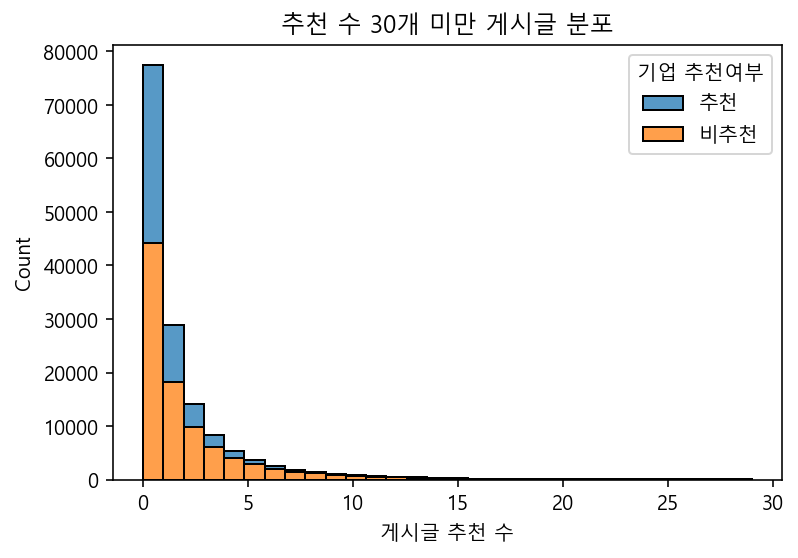

In [212]:
sns.histplot(x='Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò', data=df[df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò']<30], bins=30, hue='Í∏∞ÏóÖ Ï∂îÏ≤úÏó¨Î∂Ä', multiple='stack')
plt.title('Ï∂îÏ≤ú Ïàò 30Í∞ú ÎØ∏Îßå Í≤åÏãúÍ∏Ä Î∂ÑÌè¨');

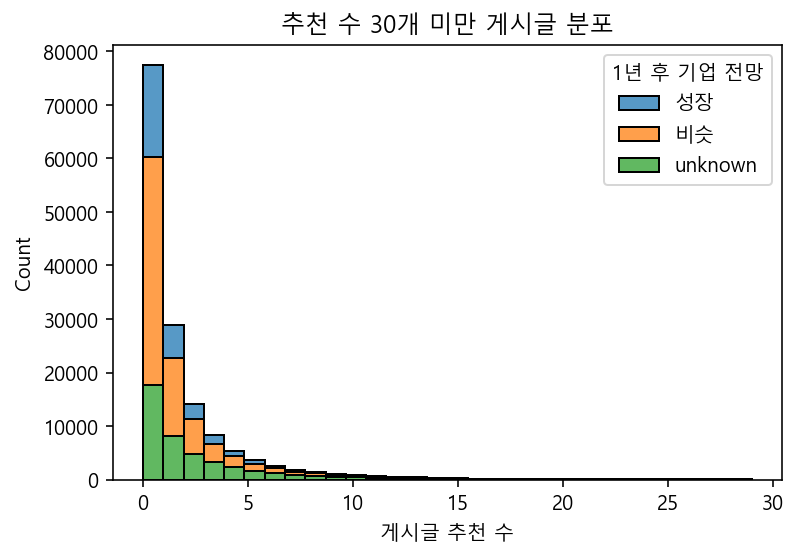

In [211]:
sns.histplot(x='Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò', data=df[df['Í≤åÏãúÍ∏Ä Ï∂îÏ≤ú Ïàò']<30], bins=30, hue='1ÎÖÑ ÌõÑ Í∏∞ÏóÖ Ï†ÑÎßù', multiple='stack')
plt.title('Ï∂îÏ≤ú Ïàò 30Í∞ú ÎØ∏Îßå Í≤åÏãúÍ∏Ä Î∂ÑÌè¨');

## Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞(ÌÖçÏä§Ìä∏) Î∂ÑÏÑù

### Ï†ÑÏ≤òÎ¶¨

In [151]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def clean_sentencese(text):
    pattern = '[\r|\n]'            # Í∞úÌñâÎ¨∏Ïûê Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl=' ', string=str(text))

    pattern = '<[^>]*>'            # html tag Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl=' ', string=str(text))
                  
    pattern = '([„Ñ±-„Öé„Öè-„Ö£])+'    # ÌïúÍ∏Ä ÏûêÏùå, Î™®Ïùå Ï†úÍ±∞ 
    text = re.sub(pattern=pattern, repl=' ', string=str(text))
    
    pattern = '[^\w\s]'            # ÌäπÏàòÍ∏∞Ìò∏ Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl=' ', string=str(text))
    
    pattern = re.compile(r'\s+')   # Ïù¥Ï§ë space Ï†úÍ±∞
    text = re.sub(pattern=pattern, repl=' ', string=str(text))
    
    return text

In [152]:
# Ï†ÑÏ≤òÎ¶¨ Ïã§Ìñâ
df['Ï¥ùÌèâ'] = df['Ï¥ùÌèâ'].map(clean_sentencese)
df['Ïû•Ï†ê'] = df['Ïû•Ï†ê'].map(clean_sentencese)
df['Îã®Ï†ê'] = df['Îã®Ï†ê'].map(clean_sentencese)
df['Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê'] = df['Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê'].map(clean_sentencese)

In [153]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = 'Í≤É Ïàò ÏÇ¨ÎûåÏù¥ ÎÑàÎ¨¥ Í≤ΩÏö∞Í∞Ä Ïã¨Ìï® Ï¢Ä ÎêòÎäî ÌïúÎã§ Ìï® Í∑∏ ÎßéÏùå Ïïà ÎåÄÎ∂ÄÎ∂Ñ Í≤ΩÏö∞ Ï°∞Í∏à ÌïòÎäî ÏóÜÎäî Îçî ÎåÄÌïú ÏóÜÍ≥† ÏóÜÎäî Í∏∞ÏóÖ Îã§Î•∏ Í∞ÄÎä• Îã§ÎãàÍ∏∞ Í≤É ÎπÑÌï¥ Ìé∏ ÏïäÏùå Îî∞Îùº ÎßéÏù¥ ÏóÖÎ¨¥ ÌïòÏßÄÎßå Í∑∏ÎûòÎèÑ ÏóÜÏùå ÏûàÏúºÎ©∞ ÎòêÌïú ÎÇòÎ¶Ñ ÌöåÏÇ¨Í∞Ä ÎòêÌïú Ï¢ãÏùÄ Ï¢ãÍ≥† Ï¢ãÏùå Ï¢ãÎã§ Í∑∏Î¶¨Í≥† ÎïåÎ¨∏Ïóê Îã§ Ïàò ÏûàÎäî Ìï† ÏùºÌï† ÌöåÏÇ¨ Îã§Îãê Ïàò ÏûàÏùå ÏûàÎã§ Îß§Ïö∞ Î∞è Îì± Ïûò ÏûàÏñ¥ ÏûàÏñ¥ÏÑú ÏûàÍ≥†'
    stops = list(stops.split())
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [154]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ïã§Ìñâ
df['Ï¥ùÌèâ'] = df['Ï¥ùÌèâ'].apply(remove_stopwords)
df['Ïû•Ï†ê'] = df['Ïû•Ï†ê'].apply(remove_stopwords)
df['Îã®Ï†ê'] = df['Îã®Ï†ê'].apply(remove_stopwords)
df['Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê'] = df['Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê'].apply(remove_stopwords)

In [155]:
df['Ï¥ùÌèâ']

index
0                                      Ï≤´ ÌöåÏÇ¨ÏòÄÍ≥† Ï≤¥Í≥ÑÍ∞Ä Ïû°ÌòÄÏûàÍ≥† Ï¢ãÏïòÏóàÎçò
1         ÏòÅÏóÖÎ∂ÄÏÑúÎäî Í∑∏ÎÇòÎßà Ïö¥ÏòÅÏù¥ ÏûòÎêòÎÇò Î≥Ñ ÏùòÎØ∏ÏóÜÎäî ÏΩòÌÖêÏ∏† Ï†úÏûëÍ¥ÄÎ†®Ìïú Î¶¨ÏÜåÏä§Í∞Ä Îì§Ïñ¥Í∞ê Î∞©Ìñ•...
2                     ÌïòÎ£®Í∞Ä Îã§Î•¥Í≤å Î∞îÎÄåÎäî Ï°∞ÏßÅÏù¥Ï†ÑÏùò Ï¢ãÏïòÎçò Í∏∞ÏñµÎßàÏ†Ä Ìá¥ÏÉâÎêòÍ≤åÌïòÎäî Í≤ΩÏòÅÏßÑ
3                         Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÎßåÏ°±Ïä§ÎüΩÏäµÎãàÎã§ ÏΩîÎ°úÎÇò Í∏∞Í∞ÑÎèôÏïà Ïû¨ÌÉùÎèÑ ÍΩ§Ïò§ÎûòÌï® 
4                                       Î¨¥ÎÇúÌûà ÌöåÏÇ¨ÏûÖÎãàÎã§ ÎÇòÏÅòÏßÄ ÏïäÏäµÎãàÎã§ 
                                ...                        
148816      ÏûÑÏõêÎì§Ïù¥ Ï†ïÎßê ÏßÅÏõêÎì§ Î≥µÏßÄ ÏïÑÏòà Ïã†Í≤ΩÏïàÏì∞Îäî Í∞ôÏïÑÏöî ÏßÅÏõêÎì§Ïù¥ ÎßåÏ°±ÏùÑ Ìï¥Ïïº ÎèåÏïÑÍ∞ÄÏ£† Ï†ïÎßê
148817        Ï†ïÎ∂ÄÏùò ÏßÄÏõêÏùÑ Î∞õÏïÑ Íµ≠ÎÇ¥ Ï§ëÏÜåÍ∏∞ÏóÖÏùò ÌôçÎ≥¥Î•º ÎèÑÏôÄÏ£ºÎäî ÌöåÏÇ¨Ï†ïÎ∂ÄÏßÄÏõêÏóê ÏùòÏ°¥ÎèÑÍ∞Ä ÎÜíÎã§ 
148818                          Í≥µÍ≥µÍ∏∞Í¥Ä ÏïÑÎûòÏóêÏÑú Ï§ëÏÜåÍ∏∞ÏóÖÏùÑ ÎèïÎäî ÏóÖÎ¨¥Îäî ÏßÑÌñâÌïòÎäî
148819              

### TF
- mecab Ïì∞Í≥† Ïã∂ÏùÄÎç∞ ÏúàÎèÑÏö∞ÏóêÏÑúÎäî mecab ÏïàÎêúÎã§Í≥† ÌïúÎã§. 
- Ï≤´ 5Î¨∏Ïû• Î∂ÑÏÑùÏãú OKTÎ≥¥Îã§ ÌïúÎÇòÎàîÏù¥ Ï°∞Í∏àÎçî ÏûêÏó∞Ïä§ÎüΩÍ≤å Î™ÖÏÇ¨Í∞Ä ÎÅäÏñ¥Ï†∏ÏÑú ÌïúÎÇòÎàîÏúºÎ°ú ÏÇ¨Ïö©

In [157]:
tmp = df.copy()

#### ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÌÖåÏä§Ìä∏ - ÌïúÎÇòÎàî

In [158]:
hannanum=Hannanum()  
han_tmp = tmp['Ïû•Ï†ê'][:5]
han_tmp

index
0                       ÏÇ¨ÎÇ¥ Ïπ¥Ìéò ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®
1    Ïó∞Ï∞®ÏÇ¨Ïö© ÏûêÏú† ÌïòÎ∞òÍ∏∞Î∂ÄÌÑ∞ ÏãúÏûëÎêòÎäî Ï†ÑÏÇ¨ Î¶¨Î™®Ìä∏ÏõåÌÅ¨Î°ú Ïù∏Ìïú ÏûêÏú®ÏÑ± Í∑πÎåÄÌôî ÏòÅÏóÖÏùò Î≥∏Ïù∏...
2    Î¶¨Î™®Ìä∏ÏõåÌÅ¨ Ï§ÄÎπÑ Ï§ëÏúºÎ°ú 6ÏõîÎ∂ÄÌÑ∞ Ï†ÑÏÇ¨ Ïû¨ÌÉùÍ∑ºÎ¨¥ ÏòàÏ†ïÏ†äÏùÄ ÏßÅÏõêÎì§ ÌåÄÎ∞îÌåÄÏù¥ÏßÄÎßå Ìï®Íªò Î≤Ñ...
3               ÌÅ∞ Ïù∏ÏÑºÌã∞Î∏åÎäî ÏóÜÏßÄÎßå Ïó∞Ï∞® ÏûêÏú†ÏÇ¨Ïö© ÏûêÏú†ÎèÑÍ∞Ä ÎÜíÍ≥† ÏàòÌèâÏ†ÅÏù∏ Í∏∞ÏóÖÎ¨∏ÌôîÏûÑ
4                    Ï†ÅÎãπÌïú ÏõåÎùºÎ≤®Í≥º ÌèâÍ∑†Ï†ÅÏù∏ Í∏âÏó¨ÏôÄ ÏãúÍ∞Ñ ÎÇòÎ•º ÎèåÏïÑÎ≥¥Í≤å Ìï©ÎãàÎã§ 
Name: Ïû•Ï†ê, dtype: object

In [159]:
han_tmp.apply(lambda x:hannanum.nouns(x))

index
0                            [Ïπ¥Ìéò, ÏïàÎßà, ÏÇ¨ÎÇ¥, Î≥µÏßÄ, ÏπºÌá¥, Î≥¥Ïû•Ìï®]
1    [Ïó∞Ï∞®ÏÇ¨Ïö©, ÏûêÏú†, ÌïòÎ∞òÍ∏∞, ÏãúÏûë, Ï†ÑÏÇ¨, Î¶¨Î™®Ìä∏ÏõåÌÅ¨, ÏûêÏú®ÏÑ±, Í∑πÎåÄÌôî, ÏòÅÏóÖ, Î≥∏...
2     [Î¶¨Î™®Ìä∏ÏõåÌÅ¨, Ï§ÄÎπÑ, Ï§ë, 6Ïõî, Ï†ÑÏÇ¨, Ïû¨ÌÉùÍ∑ºÎ¨¥, ÏòàÏ†ïÏ†ä, ÏßÅÏõêÎì§, ÌåÄÎ∞îÌåÄ, ÎèôÎ£åÎì§]
3                    [Ïù∏ÏÑºÌã∞Î∏å, Ïó∞Ï∞®, ÏûêÏú†ÏÇ¨Ïö©, ÏûêÏú†ÎèÑ, ÏàòÌèâÏ†Å, Í∏∞ÏóÖÎ¨∏ÌôîÏûÑ]
4                            [Ï†ÅÎãπ, ÏõåÎùºÎ≤®, ÌèâÍ∑†Ï†Å, Í∏âÏó¨, ÏãúÍ∞Ñ, ÎÇò]
Name: Ïû•Ï†ê, dtype: object

#### ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÌÖåÏä§Ìä∏ - Okt (Íµ¨ Ìä∏ÏúÑÌÑ∞)

In [160]:
okt = Okt()
okt_tmp = tmp['Ïû•Ï†ê'][:5]
okt_tmp

index
0                       ÏÇ¨ÎÇ¥ Ïπ¥Ìéò ÏÇ¨ÎÇ¥ ÏïàÎßàÏã§ ÏÇ¨ÎÇ¥ Î≥µÏßÄÍ∞Ä Ï¢ãÏïòÏùå ÏπºÌá¥ Î≥¥Ïû•Ìï®
1    Ïó∞Ï∞®ÏÇ¨Ïö© ÏûêÏú† ÌïòÎ∞òÍ∏∞Î∂ÄÌÑ∞ ÏãúÏûëÎêòÎäî Ï†ÑÏÇ¨ Î¶¨Î™®Ìä∏ÏõåÌÅ¨Î°ú Ïù∏Ìïú ÏûêÏú®ÏÑ± Í∑πÎåÄÌôî ÏòÅÏóÖÏùò Î≥∏Ïù∏...
2    Î¶¨Î™®Ìä∏ÏõåÌÅ¨ Ï§ÄÎπÑ Ï§ëÏúºÎ°ú 6ÏõîÎ∂ÄÌÑ∞ Ï†ÑÏÇ¨ Ïû¨ÌÉùÍ∑ºÎ¨¥ ÏòàÏ†ïÏ†äÏùÄ ÏßÅÏõêÎì§ ÌåÄÎ∞îÌåÄÏù¥ÏßÄÎßå Ìï®Íªò Î≤Ñ...
3               ÌÅ∞ Ïù∏ÏÑºÌã∞Î∏åÎäî ÏóÜÏßÄÎßå Ïó∞Ï∞® ÏûêÏú†ÏÇ¨Ïö© ÏûêÏú†ÎèÑÍ∞Ä ÎÜíÍ≥† ÏàòÌèâÏ†ÅÏù∏ Í∏∞ÏóÖÎ¨∏ÌôîÏûÑ
4                    Ï†ÅÎãπÌïú ÏõåÎùºÎ≤®Í≥º ÌèâÍ∑†Ï†ÅÏù∏ Í∏âÏó¨ÏôÄ ÏãúÍ∞Ñ ÎÇòÎ•º ÎèåÏïÑÎ≥¥Í≤å Ìï©ÎãàÎã§ 
Name: Ïû•Ï†ê, dtype: object

In [161]:
okt_tmp.apply(lambda x:okt.nouns(x))

index
0                      [ÏÇ¨ÎÇ¥, Ïπ¥Ìéò, ÏÇ¨ÎÇ¥, ÏÇ¨ÎÇ¥, Î≥µÏßÄ, ÏπºÌá¥, Î≥¥Ïû•, Ìï®]
1    [Ïó∞Ï∞®, ÏÇ¨Ïö©, ÏûêÏú†, ÌïòÎ∞òÍ∏∞, ÏãúÏûë, Ï†ÑÏÇ¨, Î¶¨, Î™®Ìä∏, Ïõå, ÏûêÏú®ÏÑ±, ÎåÄÌôî, ÏòÅ...
2         [Î¶¨, Î™®Ìä∏, Ïõå, Ï§ÄÎπÑ, Ï§ë, Ï†ÑÏÇ¨, Ïû¨ÌÉùÍ∑ºÎ¨¥, ÏòàÏ†ï, ÏßÅÏõê, ÌåÄÎ∞îÌåÄ, ÎèôÎ£å]
3               [Ïù∏ÏÑºÌã∞Î∏å, Ïó∞Ï∞®, ÏûêÏú†, ÏÇ¨Ïö©, ÏûêÏú†ÎèÑ, ÏàòÌèâ, Í∏∞ÏóÖ, Î¨∏Ìôî, ÏûÑ]
4                                  [Ïõå, ÎùºÎ≤®, ÌèâÍ∑†, Í∏âÏó¨, ÏãúÍ∞Ñ]
Name: Ïû•Ï†ê, dtype: object

### ÏõåÎìúÌÅ¨ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî 

In [162]:
%%time
col = 'Ïû•Ï†ê'
tmp[col] = tmp[col].apply(lambda x:hannanum.nouns(x))

Wall time: 7min 4s


In [78]:
%%time
Ïû•Ï†ê = Counter(list(itertools.chain(*list(tmp['Ïû•Ï†ê']))))

Wall time: 489 ms


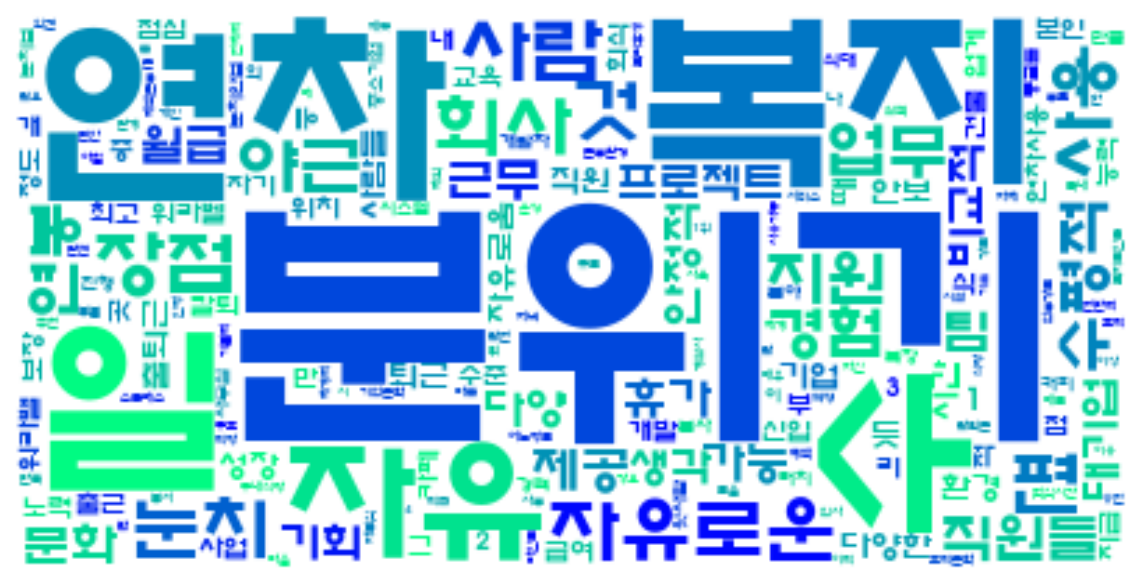

Wall time: 952 ms


In [81]:
%%time


In [85]:
%%time
col = 'Îã®Ï†ê'
tmp[col] = tmp[col].apply(lambda x:hannanum.nouns(x))

Wall time: 11min 21s


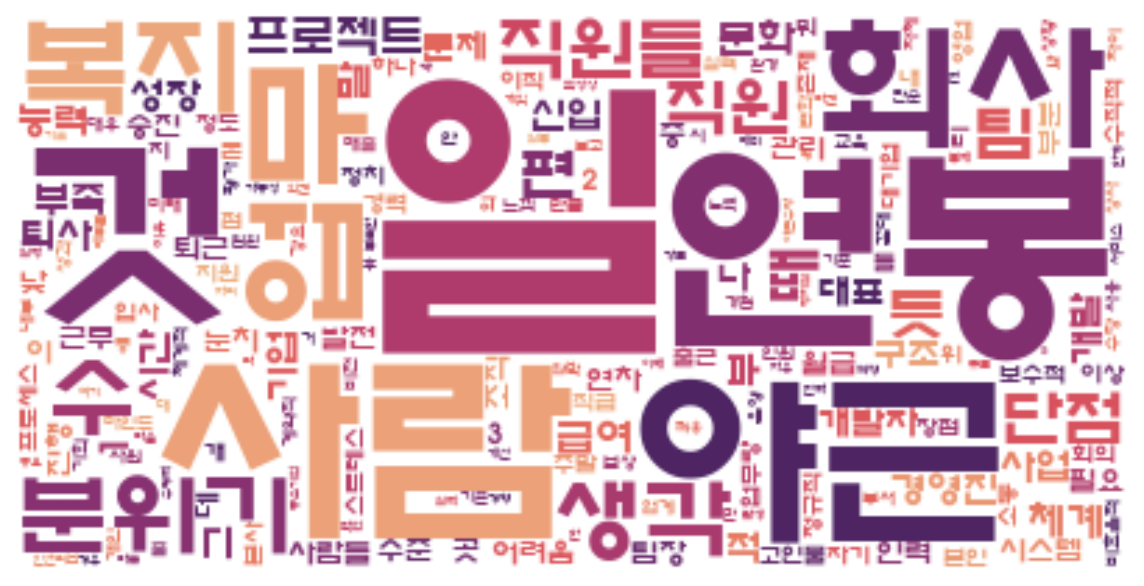

In [98]:
Îã®Ï†ê = Counter(list(itertools.chain(*list(tmp['Îã®Ï†ê']))))

wordcloud = WordCloud("./font/HYTBRB.TTF", background_color='white', colormap='flare').generate_from_frequencies(Îã®Ï†ê)
plt.figure(figsize=(10,15))
plt.axis('off') # Í∑∏ÎûòÌîÑ Ï∂ï Ï†úÍ±∞
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
%%time
col = 'Ï¥ùÌèâ'
tmp[col] = tmp[col].apply(lambda x:hannanum.nouns(x))

In [ ]:
Ï¥ùÌèâ = Counter(list(itertools.chain(*list(tmp['Ï¥ùÌèâ']))))

wordcloud = WordCloud("./font/HYTBRB.TTF", background_color='white', colormap='flare').generate_from_frequencies(Ï¥ùÌèâ)
plt.figure(figsize=(10,15))
plt.axis('off') # Í∑∏ÎûòÌîÑ Ï∂ï Ï†úÍ±∞
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
%%time
col = 'Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê'
tmp[col] = tmp[col].apply(lambda x:hannanum.nouns(x))

In [ ]:
Í≤ΩÏòÅÏßÑ = Counter(list(itertools.chain(*list(tmp['Ï¥ùÌèâ']))))

wordcloud = WordCloud("./font/HYTBRB.TTF", background_color='white', colormap='flare').generate_from_frequencies(Í≤ΩÏòÅÏßÑ)
plt.figure(figsize=(10,15))
plt.axis('off') # Í∑∏ÎûòÌîÑ Ï∂ï Ï†úÍ±∞
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [102]:
sorted(Îã®Ï†ê.items(), key=lambda x:x[1], reverse=True)

[('Ïùº', 32872),
 ('Ïó∞Î¥â', 25356),
 ('ÏÇ¨Îûå', 21007),
 ('Í≤É', 20813),
 ('ÏïºÍ∑º', 17125),
 ('ÌöåÏÇ¨', 15964),
 ('ÏóÖÎ¨¥', 14096),
 ('Î≥µÏßÄ', 13211),
 ('Î∂ÑÏúÑÍ∏∞', 11947),
 ('Ïàò', 11071),
 ('ÏÉùÍ∞Å', 10846),
 ('ÏßÅÏõêÎì§', 10798),
 ('ÏßÅÏõê', 9333),
 ('Îã®Ï†ê', 8547),
 ('ÌåÄ', 8505),
 ('ÎìØ', 8067),
 ('Îïå', 7899),
 ('Ìé∏', 7777),
 ('ÌîÑÎ°úÏ†ùÌä∏', 7728),
 ('Î¨∏Ìôî', 5986),
 ('Ï≤¥Í≥Ñ', 5980),
 ('1', 5741),
 ('Í∏âÏó¨', 5729),
 ('Îßê', 5608),
 ('Í∞úÎ∞ú', 5159),
 ('ÏãúÍ∞Ñ', 5091),
 ('Ïã†ÏûÖ', 4986),
 ('ÏÇ¨ÏóÖ', 4980),
 ('Í≤ΩÏòÅÏßÑ', 4940),
 ('ÏÑ±Ïû•', 4933),
 ('Î∂ÄÏ°±', 4821),
 ('Î∂Ä', 4743),
 ('Í∑∏', 4552),
 ('Ï†Å', 4525),
 ('Îä•Î†•', 4432),
 ('Í∏∞ÏóÖ', 4408),
 ('Ìá¥ÏÇ¨', 4395),
 ('Í∞úÎ∞úÏûê', 4275),
 ('Î¨∏Ï†ú', 4223),
 ('ÎÇò', 4164),
 ('ÎåÄÌëú', 4126),
 ('Íµ¨Ï°∞', 4069),
 ('ÏÇ¨ÎûåÎì§', 4050),
 ('ÏßÑÌñâ', 4018),
 ('ÌïÑÏöî', 3991),
 ('Îç∞', 3982),
 ('2', 3977),
 ('Ïó∞Ï∞®', 3897),
 ('Í∑ºÎ¨¥', 3860),
 ('Í≥≥', 3844),
 ('ÏõîÍ∏â', 3828),
 ('Î∞úÏ†Ñ', 3792),
 ('Ïù¥', 3759),
 ('Î∂ÄÎ∂Ñ', 360

In [ ]:
%%time
arr_reviews = ['Ï¥ùÌèâ', 'Ïû•Ï†ê','Îã®Ï†ê','Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê']
for col in arr_reviews:
    tmp[col] = tmp[col].apply(lambda x:hannanum.nouns(x))

In [ ]:
Ï¥ùÌèâ = Counter(list(itertools.chain(*list(tmp['Ï¥ùÌèâ']))))
Ïû•Ï†ê = Counter(list(itertools.chain(*list(tmp['Ïû•Ï†ê']))))
Îã®Ï†ê = Counter(list(itertools.chain(*list(tmp['Îã®Ï†ê']))))
Í≤ΩÏòÅÏßÑ = Counter(list(itertools.chain(*list(tmp['Í≤ΩÏòÅÏßÑÏóê Î∞îÎùºÎäî Ï†ê']))))

In [ ]:
#Ïû•Ï†ê
wordcloud = WordCloud("./font/HYTBRB.TTF", background_color='white', colormap='winter').generate_from_frequencies(Ïû•Ï†ê)
plt.figure(figsize=(10,15))
plt.axis('off') # Í∑∏ÎûòÌîÑ Ï∂ï Ï†úÍ±∞
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
#Îã®Ï†ê
wordcloud = WordCloud("./font/HYTBRB.TTF", background_color='white', colormap='winter').generate_from_frequencies(Îã®Ï†ê)
plt.figure(figsize=(10,15))
plt.axis('off') # Í∑∏ÎûòÌîÑ Ï∂ï Ï†úÍ±∞
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Ï†ïÎ¶¨

# Í≥†Ï∞∞
- ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Ïùò stemming Í∏∞Îä•ÏùÑ Ïç®ÏÑú Ï°∞Í∏àÎçî ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤†Îã§.
  - ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î°ú Î™ÖÏÇ¨, ÎèôÏÇ¨ Î®ºÏ†Ä Ï∂îÏ∂úÌïúÎã§Ïùå(ÏãúÍ∞ÑÎèÑ Ïò§Îûò Í±∏Î¶¨Í≥†) Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨Î•º ÎÇòÏ§ëÏóê ÌïúÎã§.
    - ÏßÄÍ∏àÏùÄ Ï†ÑÏ≤òÎ¶¨, Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Î®ºÏ†ÄÌïòÍ≥† Î∞îÎ°ú TF-IDF -> Î™®Îç∏ Î∂ÑÏÑù
    - ÌòπÏùÄ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ÍπåÏßÄ Ïç®ÏÑú Ïû•Îã®Ï†êÏóê ÎåÄÌïú ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Î∂ÑÏÑù
  - (Ï∞∏Í≥†:https://www.youtube.com/watch?v=R3jlcyehc50)

- PC - RAM Î∂ÄÏ°±ÏúºÎ°ú Ï†ÑÏ≤¥Ïóê ÎåÄÌïú tf-idf ÏßÑÌñâÏù¥ Ïñ¥Î†§Ïõ†Ïùå
  - Ïù¥ Í≤ΩÏö∞ Ïñ¥ÎñªÍ≤å Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ìï¥Í≤∞Î≤ï Ï∞æÏïÑ ÌïôÏäµ Ìï¥Î≥º Í≤É
  - Î∂ÑÌï†Ìï¥ÏÑú Ï≤òÎ¶¨ÌïòÍ≥†, Í≤∞Í≥ºÎ•º ÏóÖÎç∞Ïù¥Ìä∏ Ìï¥Ï§òÏïº ÌïòÎäîÏßÄ?

- Î≥¥Îã§ Îã§ÏñëÌïú Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞úÍ≤¨ÏùÑ ÏúÑÌï¥ÏÑúÎäî, Îã§ÏñëÌïú ÏÜåÏä§ÏóêÏÑú Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Ï∂îÍ∞ÄÎ°ú Î∂ôÏù¥Í≥† Ï≤òÎ¶¨ÌïòÍ≥† Ìï¥ÏïºÌï† ÎìØ ÌïòÎã§. 